<a href="https://colab.research.google.com/github/saks0106/ML_Frequent-Lookouts/blob/main/0.0.LR_LoR_DT_Reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

https://www.kaggle.com/code/damodarabarbosa/star-type-detection-logistic-regression-97-22

https://github.com/deepraj1729/AstroML/blob/master/Star%20Classifier/6%20Class%20Classification%20of%20stars/6%20Class%20Classifier%20for%20Star%20Classification.ipynb

#Logistics Regression

In [ ]:
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)# stratify=y split y equally
reg_model = LinearRegression()
mse = cross_val_score(reg_model,X_train, y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
mean_mse # this value should be near to zero

reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

#for coef_ of columns
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[idx]))

sns.regplot(x=X_test_preds,y=y_test)
plt.show()

y_pred = reg.predict(X_test)
plt.scatter(y_test, y_pred)


residual = y_test-y_pred
plt.scatter(residual, y_pred)



from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,50,70,100]} # controls the regularization strenth
# alpha 0 means normal Linear Regression
# alphas = np.logspace(-6, 6, 200)
ridge_reg = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(X_train, y_train)
print(ridge_reg.best_params_) #which is the best lambda value
print(ridge_reg.best_score_)
preds_ridge = ridge_reg.predict(X_test)
sns.distplot(y_test-preds_ridge)




from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,50,70,100]}
lasso_reg = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(X_train, y_train)
print(lasso_reg.best_params_) #which is the best lambda value
print(lasso_reg.best_score_)
preds_lasso = lasso_reg.predict(X_test)
sns.distplot(y_test-preds_lasso)


from sklearn.linear_model import ElasticNet
en = ElasticNet()
alphas = {'alpha':[0,1,2,3,4,5,6,7,8,9,10]}
gsen = GridSearchCV(en,param_grid=alphas, scoring='neg_mean_squared_error',cv=5)
gsen.fit(X_train,y_train)
y_pred = gsen.predict(X_test)
residual = y_test-y_pred
sns.displot(residual)
gsen.score(X_test,y_test)

# import plotly.express as px
# fig = px.scatter_3d(df, x='pedi',y='skin',z='mass',color='class')
# fig.show()


from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
#poly features create features like combining 2 or more columns and its effect on y is checked
# interaction_only False(default) means we get all columns in output, if True we get original dataset + interaction columns
# change degree
# changing degree makes the line curved
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

#Logistics Regression
Regularization is applied by default. It can handle both dense and sparse input

l2- is by Default

dual, tot, fit_intercept, intercept_scaling - keep default values

C - Default is 1-weakest Regularization, close to 0-stronger the Regularization

class_weight is used when y has imbalanced data like 90:10, default=None

max_iter is no of epochs

multi_class - ovr - oneVsrest: for every class seperate logistics regression is applied, best is auto

warm_start:if training interrupted, it will begin from where you started, default False

l1_ratio: use if elasticRegression is used



In [ ]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

In [ ]:
pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=192ad93a6388ecb416ac5ab7e5ad1a6f14820ba5c0e857a1170e293af3b5450b
  Stored in directory: /root/.cache/pip/wheels/d5/1a/3e/6193fe1c56168f5df4aef57d8411033ba4611881135d495727
Successfully built pyforest


In [ ]:
from pyforest import*
lazy_imports()

['from sklearn.model_selection import cross_val_score',
 'import statsmodels.api as sm',
 'import seaborn as sns',
 'from sklearn.ensemble import RandomForestClassifier',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from dask import dataframe as dd',
 'from sklearn.linear_model import Lasso',
 'import matplotlib as mpl',
 'import matplotlib.pyplot as plt',
 'from sklearn.model_selection import KFold',
 'from sklearn import svm',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.cluster import KMeans',
 'import xgboost as xgb',
 'import lightgbm as lgb',
 'from sklearn.linear_model import LinearRegression',
 'from sklearn.model_selection import RandomizedSearchCV',
 'from sklearn.preprocessing import OneHotEncoder',
 'import numpy as np',
 'import skimage',
 'import spacy',
 'from sklearn.impute import SimpleImputer',
 'import re',
 'import torch',
 'from sklearn.linear_model import LogisticRegression',
 'from scipy import stats',
 'import keras',
 'import textblob',
 '

In [ ]:
pdata = pd.read_csv("pima-indians-diabetes-2.csv")
pdata

<IPython.core.display.Javascript object>

Preg  Plas  Pres  skin  test  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
..    ...   ...   ...   ...   ...   ...    ...  ...    ...
763    10   101    76    48   180  32.9  0.171   63      0
764     2   122    70    27     0  36.8  0.340   27      0
765     5   121    72    23   112  26.2  0.245   30      0
766     1   126    60     0     0  30.1  0.349   47      1
767     1    93    70    31     0  30.4  0.315   23      0

[768 rows x 9 columns]

In [ ]:
pdata.shape

(768, 9)

In [ ]:
pdata.isna().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [ ]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
pdata.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

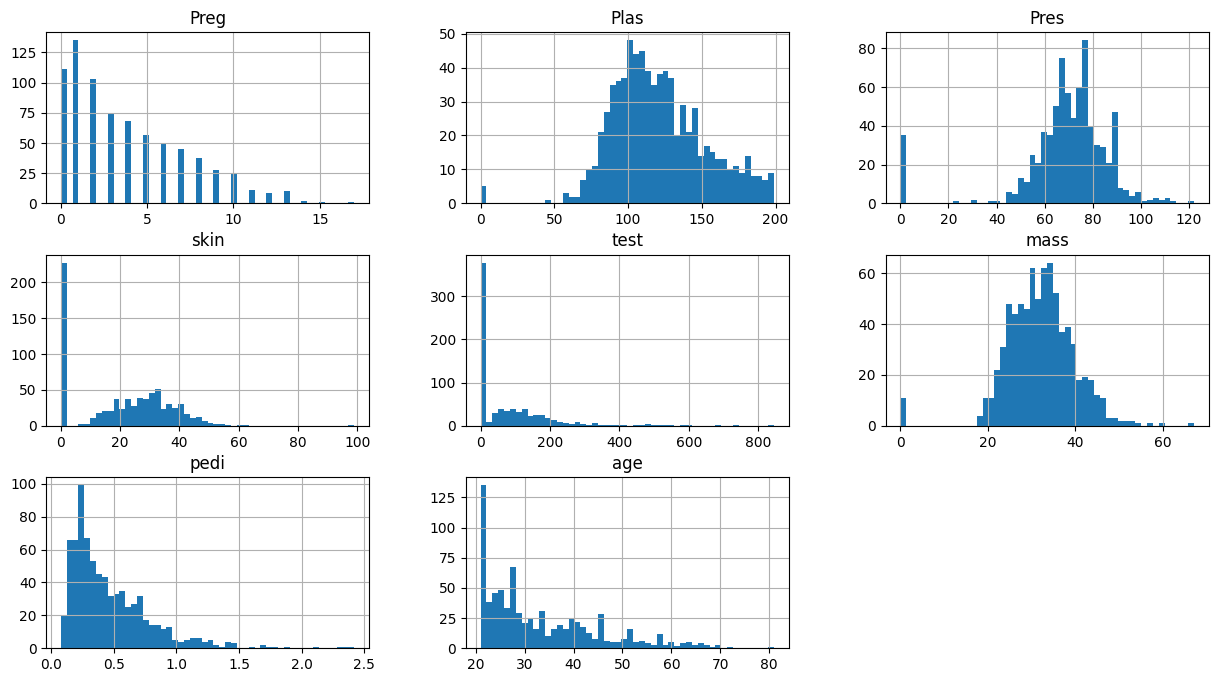

In [ ]:
cols = list(pdata)[:-1]
pdata[cols].hist(stacked=True,bins=50,figsize=(15,8));

In [ ]:
pdata.corr()

Preg      Plas      Pres      skin      test      mass      pedi  \
Preg   1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
Plas   0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
Pres   0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
skin  -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
test  -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
mass   0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
pedi  -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
age    0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   
class  0.221898  0.466581  0.065068  0.074752  0.130548  0.292695  0.173844   

            age     class  
Preg   0.544341  0.221898  
Plas   0.263514  0.466581  
Pres   0.239528  0.065068  
skin  -0.113970  0.074752  
test  -0.042163  0.130548  
mass   0.036242  0.292695  
pedi   0.033561  0.173844  
age    1.000000  0.238356  
class  0.238356  1.000000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

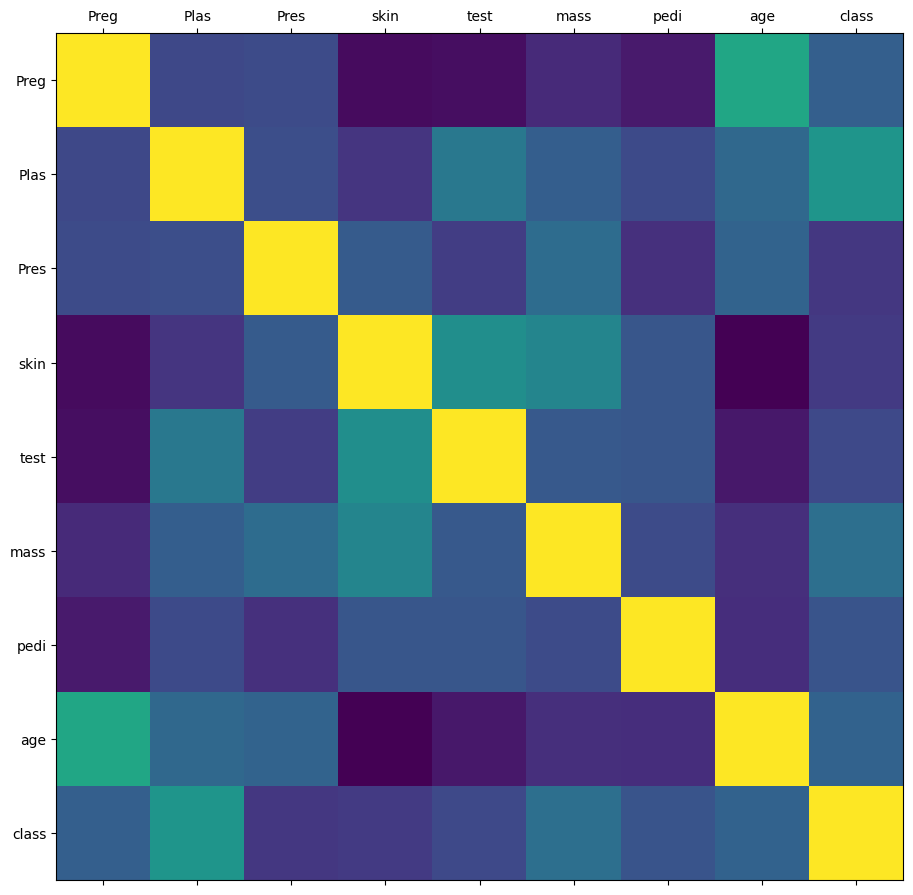

In [ ]:
def plot_corr(df,size=11):
  corr = df.corr()
  fig, ax = plt.subplots(figsize=(size,size))
  ax.matshow(corr)
  plt.xticks(range(len(corr.columns)), corr.columns)
  plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(pdata)

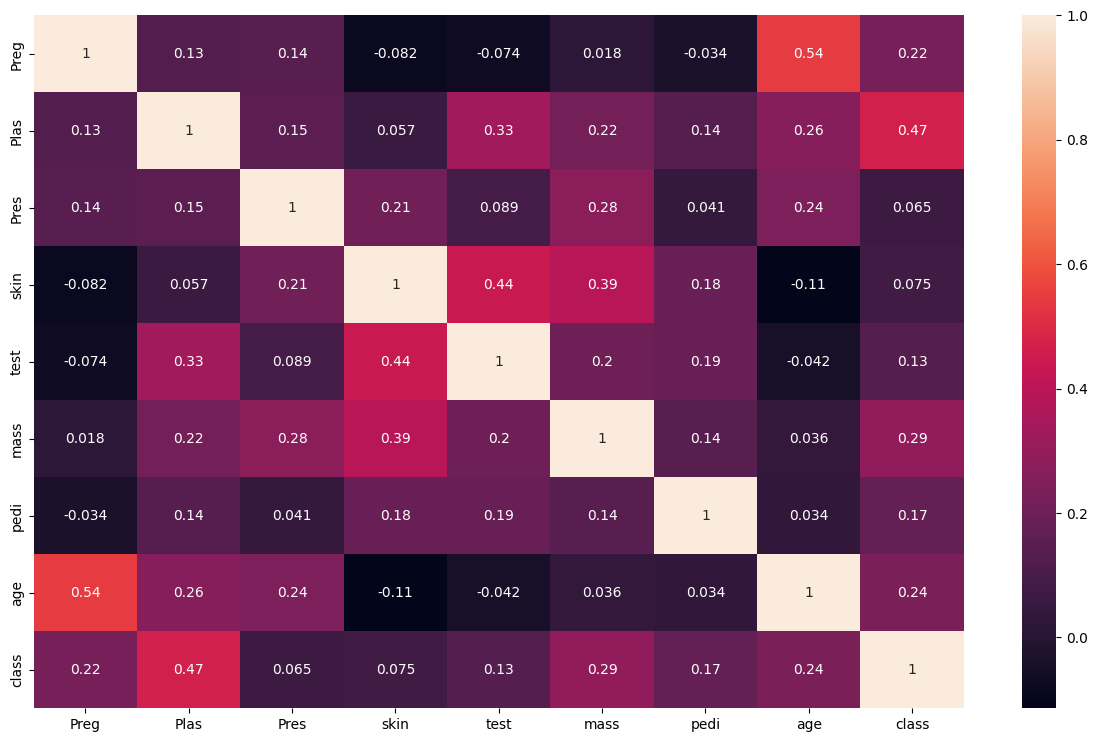

In [ ]:
plt.figure(figsize=(15,9))
sns.heatmap(pdata.corr(),annot=True);


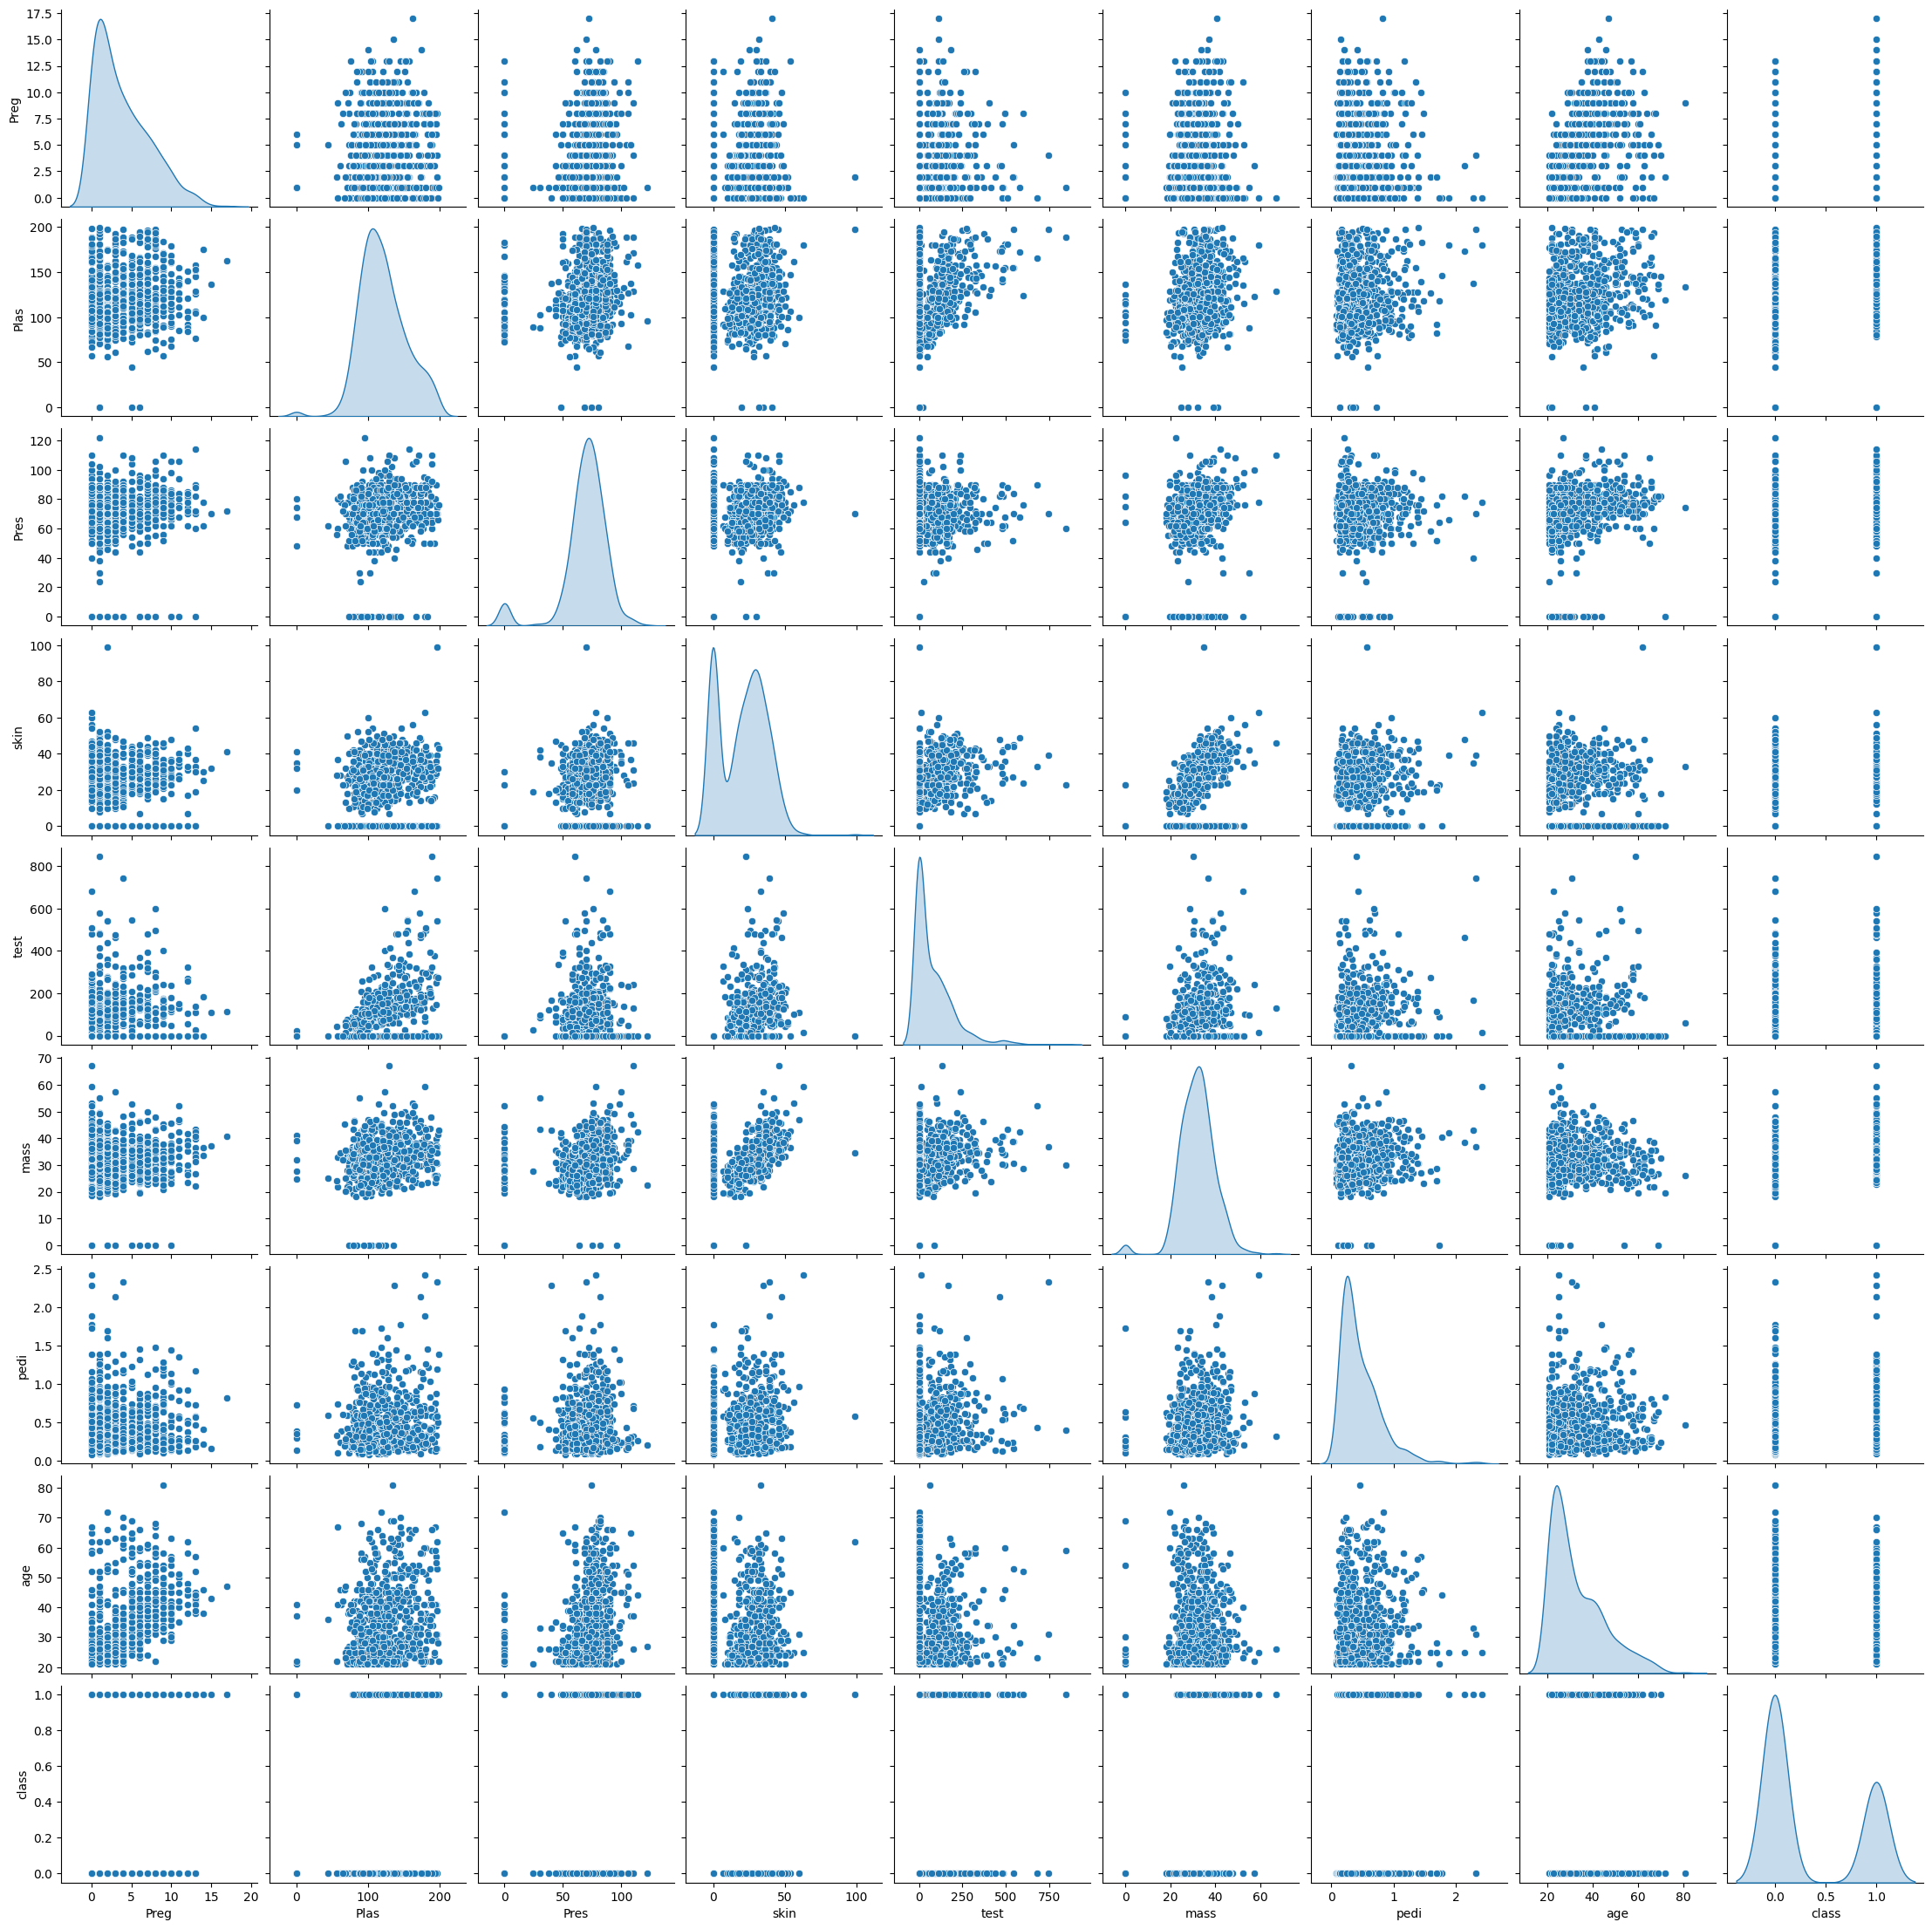

In [ ]:
sns.pairplot(pdata,diag_kind='kde')
plt.show()

Calculate diabetes ratio of True/False from outcome variable

In [ ]:
n_true = len(pdata.loc[pdata['class']==1])
n_false = len(pdata.loc[pdata['class']==0])
print("Number of +ve cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of -ve cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of +ve cases: 268 (34.90%)
Number of -ve cases: 500 (65.10%)


Spliting the data

We will use 70% of data for training and 30% for testing.

In [ ]:
pdata.head()

Preg  Plas  Pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

In [ ]:
X = pdata.drop('class',axis=1)
Y = pdata['class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

69.92% data is in training set
30.08% data is in test set


Now lets check diabetes True/False ratio in split data 

In [ ]:
print("Original Diabetes True Values    : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['class'] == 1]), (len(pdata.loc[pdata['class'] == 1])/len(pdata.index)) * 100))
print("Original Diabetes False Values   : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['class'] == 0]), (len(pdata.loc[pdata['class'] == 0])/len(pdata.index)) * 100))
print("")
print("Training Diabetes True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Diabetes False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Diabetes True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Diabetes False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Diabetes True Values    : 268 (34.90%)
Original Diabetes False Values   : 500 (65.10%)

Training Diabetes True Values    : 188 (35.01%)
Training Diabetes False Values   : 349 (64.99%)

Test Diabetes True Values        : 80 (34.63%)
Test Diabetes False Values       : 151 (65.37%)



Data Preparation
Check hidden missing values

As we checked missing values earlier but haven't got any. But there can be lots of entries with 0 values. We must need to take care of those as well.

In [ ]:
x_train.head() # We can see lots of 0 entries above.

Preg  Plas  Pres  skin  test  mass   pedi  age
334     1    95    60    18    58  23.9  0.260   22
139     5   105    72    29   325  36.9  0.159   28
485     0   135    68    42   250  42.3  0.365   24
547     4   131    68    21   166  33.1  0.160   28
18      1   103    30    38    83  43.3  0.183   33

Replace 0s with serial mean

In [ ]:
cols = x_train.columns
cols

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')

In [ ]:
#from sklearn.preprocessing import Imputer
#my_imputer = Imputer()
#data_with_imputed_values = my_imputer.fit_transform(original_data)

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=0,strategy='mean')

x_train = pd.DataFrame(imp.fit_transform(x_train))
x_test = pd.DataFrame(imp.fit_transform(x_test))




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
cols

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')

In [ ]:
x_train.columns = cols
x_test.columns = cols

In [ ]:
x_train

Preg   Plas        Pres      skin        test  mass   pedi   age
0     1.000000   95.0   60.000000  18.00000   58.000000  23.9  0.260  22.0
1     5.000000  105.0   72.000000  29.00000  325.000000  36.9  0.159  28.0
2     4.340564  135.0   68.000000  42.00000  250.000000  42.3  0.365  24.0
3     4.000000  131.0   68.000000  21.00000  166.000000  33.1  0.160  28.0
4     1.000000  103.0   30.000000  38.00000   83.000000  43.3  0.183  33.0
..         ...    ...         ...       ...         ...   ...    ...   ...
532   5.000000  139.0   64.000000  35.00000  140.000000  28.6  0.411  26.0
533   1.000000   96.0  122.000000  28.64752  155.333333  22.4  0.207  27.0
534  10.000000  101.0   86.000000  37.00000  155.333333  45.6  1.136  38.0
535   4.340564  141.0   72.241313  28.64752  155.333333  42.4  0.205  29.0
536   4.340564  125.0   96.000000  28.64752  155.333333  22.5  0.262  21.0

[537 rows x 8 columns]

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [ ]:
params = [{'C':[1,5,10]},{'max_iter':[100,150]}]
model = LogisticRegression( solver='liblinear') #class_weight = balanced when y is balanced
model = GridSearchCV(model,param_grid=params,scoring='f1',cv=5)
model.fit(x_train,y_train)

<IPython.core.display.Javascript object>

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': [1, 5, 10]}, {'max_iter': [100, 150]}],
             scoring='f1')

In [ ]:
model.best_params_

{'C': 10}

In [ ]:
model.best_score_

0.6457517975524716

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
model_score = model.score(x_test, y_test)
print(model_score)

0.6103896103896105


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
confusion_matrix(y_test,y_predict)

array([[124,  27],
       [ 33,  47]])

In [ ]:
accuracy_score(y_test,y_predict)

0.7402597402597403

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
cm = metrics.confusion_matrix(y_test,y_predict,labels=[1,0])
dfcm = pd.DataFrame(cm,index=[i for i in ['1','0']], columns = [i for i in ["Predict 1","Predict 0"]])
dfcm



<IPython.core.display.Javascript object>

Predict 1  Predict 0
1         47         33
0         27        124

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

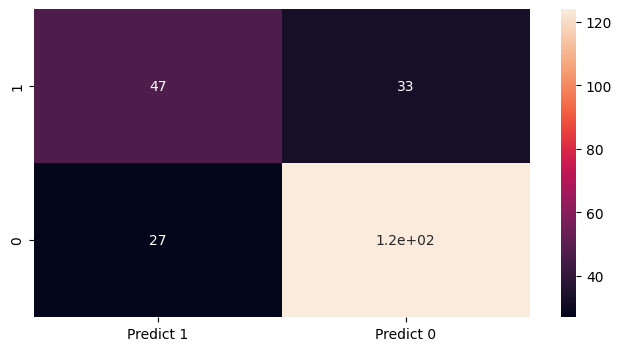

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(dfcm,annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that they do have diabetes 48

True Negatives (TN): we correctly predicted that they don't have diabetes 132

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 14 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 37 Falsely predict negative Type II error

#Classification Metrics:

    Classification Accuracy
    Confusion Matrix.
    Classification Report.
    Area Under the Curve (AUC) and ROC Curve.



Classification Accuracy

In [ ]:
# Evaluate a logistic regression model using k-fold cross-validation
from numpy import mean, std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression


In [ ]:
# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
cv = KFold(n_splits=10,random_state=42,shuffle=True)
model = LogisticRegression()
scores = cross_val_score(model, X,y,cv=cv,n_jobs=-1,scoring='accuracy')
print(f"Accuracy is {mean(scores)*100}%")

Accuracy is 80.0


Confusion Matrix.

Classification Report.

In [ ]:
print(metrics.classification_report(y_test,y_preds))

Area Under the Curve (AUC) and ROC Curve.

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

import pylab as pl
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
random_state = np.random.RandomState(0)
import warnings
warnings.filterwarnings('ignore')



df = read_csv('/content/pima-indians-diabetes-2.csv')

X = df.drop('class',axis = 1)
Y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=1)


classifier1 = LogisticRegression()

classifier2 = svm.SVC(kernel='linear', probability=True)


probas1_ = classifier1.fit(X_train, y_train).predict_proba(X_test)
probas2_ = classifier2.fit(X_train, y_train).predict_proba(X_test)

probas1_True positive == Recall

The false positive rate is calculated as the ratio between the number of negative events wrongly categorized as positive (false positives) and the total number of actual negative events (regardless of classification).

FP/FP+TN:


In [ ]:
# Compute ROC curve and area the curve for logistic

fpr1, tpr1, threshold1 = roc_curve(y_test,probas1_[:,1])
roc_auc1 = auc(fpr1,tpr1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.830211


In [ ]:
# Compute ROC curve and area the curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.835984


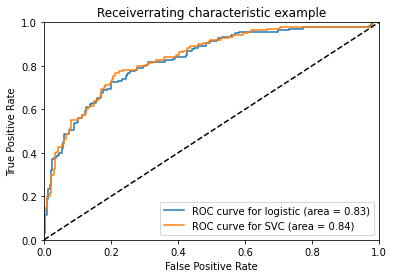

In [ ]:
# Plot the ROC
pl.clf()
pl.plot(fpr1,tpr1,label='ROC curve for logistic (area = %0.2f)' % roc_auc1)
pl.plot(fpr2, tpr2, label='ROC curve for SVC (area = %0.2f)' % roc_auc2)

pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

*Higher* the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the diabetes and no diabetes.

#Ensemble Techniques and Random Forest

We are going to build a model that predicts if someone who seeks a loan might be a defaulter or a non-defaulter. We have several independent variables like, checking account balance, credit history, purpose, loan amount etc. For more details on the dataset, please see source at https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

**max_features -** number of features/columns to be considered while splitting. If high dims data and overfitting is happening, reduce this feature. If 100 features, max_features=50, when split on node happens it will randomly select 50 features for splitting at node. auto and sqrt are same ie equal importance to all features and wherever max Information Gain is present on that node that feature is selected. 

**bootstrap -** - row sampling with replacement, default is True

**max_samples -** - how many rows for each DT

**min_sample_split -** - if that many rows are left then split can happen. Eg if value 100, if on any node, no of rows is less than 100 then splitting stops and becomes a left node. If value high--> underfitting, more the value-->overfitting 

**min_sample_leaf -** - min no of samples required for leaf node. Very similar to **min_sample_split**. If value high--> underfitting, more the value-->overfitting 


**max_leaf_nodes -** - how many leaf node ie terminal nodes where further split will not happen.  If value high--> underfitting, more the value-->overfitting 

**min_impurity_decrease -** if this much impurity reduces then only splitting will happen
 
**bootstrap -** bootstraping with replacement. Default is True ie Replacement of rows will happen

**class_weight -** when dataset is imbalanced

## **Activities**:


1. Data Pre-processing
2. Building Machine Learning models:

  a. Decision Tree 

  b. Regularization to Prune Decision Tree

  c. Ensemble models

    i) Bagging

    ii) AdaBoosting

    iii)  GradientBoost

    iv) XGBoost

    v) Random Forest


#Notes:
1. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [ ]:
cd = pd.read_csv('credit.csv')
cd.head()

checking_balance  months_loan_duration credit_history               purpose  \
0           < 0 DM                     6       critical  furniture/appliances   
1       1 - 200 DM                    48           good  furniture/appliances   
2          unknown                    12       critical             education   
3           < 0 DM                    42           good  furniture/appliances   
4           < 0 DM                    24           poor                   car   

   amount savings_balance employment_duration  percent_of_income  \
0    1169         unknown           > 7 years                  4   
1    5951        < 100 DM         1 - 4 years                  2   
2    2096        < 100 DM         4 - 7 years                  2   
3    7882        < 100 DM         4 - 7 years                  2   
4    4870        < 100 DM         1 - 4 years                  3   

   years_at_residence  age other_credit housing  existing_loans_count  \
0                   4   67         none     own                     2   
1                   2   22         none     own                     1   
2                   3   49         none     own                     1   
3                   4   45         none   other                     1   
4                   4   53         none   other                     2   

         job  dependents phone default  
0    skilled           1   yes      no  
1    skilled           1    no     yes  
2  unskilled           2    no      no  
3    skilled           2    no      no  
4    skilled           2    no     yes

In [ ]:
cd.shape

(1000, 17)

In [ ]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

Lets convert the columns with an 'object' datatype into categorical variables

In [ ]:
for i in cd.columns:
  if cd[i].dtype =='object':
    cd[i] = pd.Categorical(cd[i])

In [ ]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

We need to address > < values as well as all categorical values

In [ ]:
cd.sample(10)

checking_balance  months_loan_duration credit_history  \
790       1 - 200 DM                    21           good   
169       1 - 200 DM                    24       critical   
247          unknown                     6        perfect   
617           < 0 DM                     6       critical   
764          unknown                    24       critical   
883          unknown                    18       critical   
514          unknown                    24           good   
495           < 0 DM                    24           good   
570           < 0 DM                    24           good   
60        1 - 200 DM                     9           good   

                  purpose  amount savings_balance employment_duration  \
790              business    1188        < 100 DM           > 7 years   
169              business    1935        < 100 DM           > 7 years   
247                   car    1204    100 - 500 DM         1 - 4 years   
617                   car    3676        < 100 DM         1 - 4 years   
764                   car    2463    100 - 500 DM         4 - 7 years   
883  furniture/appliances    1098        < 100 DM          unemployed   
514                   car    2255         unknown            < 1 year   
495  furniture/appliances    2996         unknown         1 - 4 years   
570  furniture/appliances    3234        < 100 DM            < 1 year   
60               business    1391        < 100 DM         1 - 4 years   

     percent_of_income  years_at_residence  age other_credit housing  \
790                  2                   4   39         none     own   
169                  4                   4   31         none     own   
247                  4                   1   35         bank    rent   
617                  1                   3   37         none    rent   
764                  4                   3   27         none     own   
883                  4                   4   65         none     own   
514                  4                   1   54         none     own   
495                  2                   4   20         none     own   
570                  4                   4   23         none    rent   
60                   2                   1   27         bank     own   

     existing_loans_count         job  dependents phone default  
790                     1     skilled           2    no     yes  
169                     2     skilled           1   yes     yes  
247                     1     skilled           1    no      no  
617                     3     skilled           2    no      no  
764                     2     skilled           1   yes      no  
883                     2  unemployed           1    no      no  
514                     1     skilled           1    no      no  
495                     1     skilled           1    no     yes  
570                     1   unskilled           1   yes     yes  
60                      1     skilled           1   yes      no

In [ ]:
#those features with order in their categories 

replaceStruct = {
                "checking_balance":     {"< 0 DM": 1, "1 - 200 DM": 2 ,"> 200 DM": 3 ,"unknown":-1},
                "credit_history": {"critical": 1, "poor":2 , "good": 3, "very good": 4,"perfect": 5},
                 "savings_balance": {"< 100 DM": 1, "100 - 500 DM":2 , "500 - 1000 DM": 3, "> 1000 DM": 4,"unknown": -1},
                 "employment_duration":     {"unemployed": 1, "< 1 year": 2 ,"1 - 4 years": 3 ,"4 - 7 years": 4 ,"> 7 years": 5},
                "phone":     {"no": 1, "yes": 2 },
                #"job":     {"unemployed": 1, "unskilled": 2, "skilled": 3, "management": 4 },
                "default":     {"no": 0, "yes": 1 } 
                    }
#those features with NO order in their categories                   
oneHotCols=["purpose","housing","other_credit","job"]


In [ ]:
cdn = cd.replace(replaceStruct)

In [ ]:
cdn = pd.get_dummies(cdn,columns=oneHotCols) # drop_first=True

In [ ]:
cdn.head().T

0                     1          2  \
checking_balance                         1                     2         -1   
months_loan_duration                     6                    48         12   
credit_history                           1                     3          1   
purpose               furniture/appliances  furniture/appliances  education   
amount                                1169                  5951       2096   
savings_balance                         -1                     1          1   
employment_duration                      5                     3          4   
percent_of_income                        4                     2          2   
years_at_residence                       4                     2          3   
age                                     67                    22         49   
other_credit                          none                  none       none   
housing                                own                   own        own   
existing_loans_count                     2                     1          1   
job                                skilled               skilled  unskilled   
dependents                               1                     1          2   
phone                                    2                     1          1   
default                                  0                     1          0   

                                         3        4  
checking_balance                         1        1  
months_loan_duration                    42       24  
credit_history                           3        2  
purpose               furniture/appliances      car  
amount                                7882     4870  
savings_balance                          1        1  
employment_duration                      4        3  
percent_of_income                        2        3  
years_at_residence                       4        4  
age                                     45       53  
other_credit                          none     none  
housing                              other    other  
existing_loans_count                     1        2  
job                                skilled  skilled  
dependents                               2        2  
phone                                    1        1  
default                                  0        1

In [ ]:
cdn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

In [ ]:
#Split Data

In [ ]:
cdn.head()

checking_balance  months_loan_duration credit_history               purpose  \
0                1                     6              1  furniture/appliances   
1                2                    48              3  furniture/appliances   
2               -1                    12              1             education   
3                1                    42              3  furniture/appliances   
4                1                    24              2                   car   

   amount savings_balance employment_duration  percent_of_income  \
0    1169              -1                   5                  4   
1    5951               1                   3                  2   
2    2096               1                   4                  2   
3    7882               1                   4                  2   
4    4870               1                   3                  3   

   years_at_residence  age other_credit housing  existing_loans_count  \
0                   4   67         none     own                     2   
1                   2   22         none     own                     1   
2                   3   49         none     own                     1   
3                   4   45         none   other                     1   
4                   4   53         none   other                     2   

         job  dependents phone default  
0    skilled           1     2       0  
1    skilled           1     1       1  
2  unskilled           2     1       0  
3    skilled           2     1       0  
4    skilled           2     1       1

In [ ]:
cdn.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [ ]:
X = cdn.drop("default", axis=1)
y = cdn.pop("default")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'. Here if default hyperparameters are used ie Post Prunning


In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=42)
dtree.fit(X_train, y_train)

ValueError: ignored

In [ ]:
print(dtree.score(X_train, y_train))
print(dtree.score(X_test, y_test))

ValueError: ignored

Visualizing the Decision Tree

In [ ]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dtree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

tree.export_graphviz outputs a .dot file. This is a text file that describes a graph structure using a specific structure. You can plot this by

1. pasting the contents of that file at  http://webgraphviz.com/ (or)
2. generate a image file using the 'dot' command (this will only work if you have graphviz installed on your machine)


In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


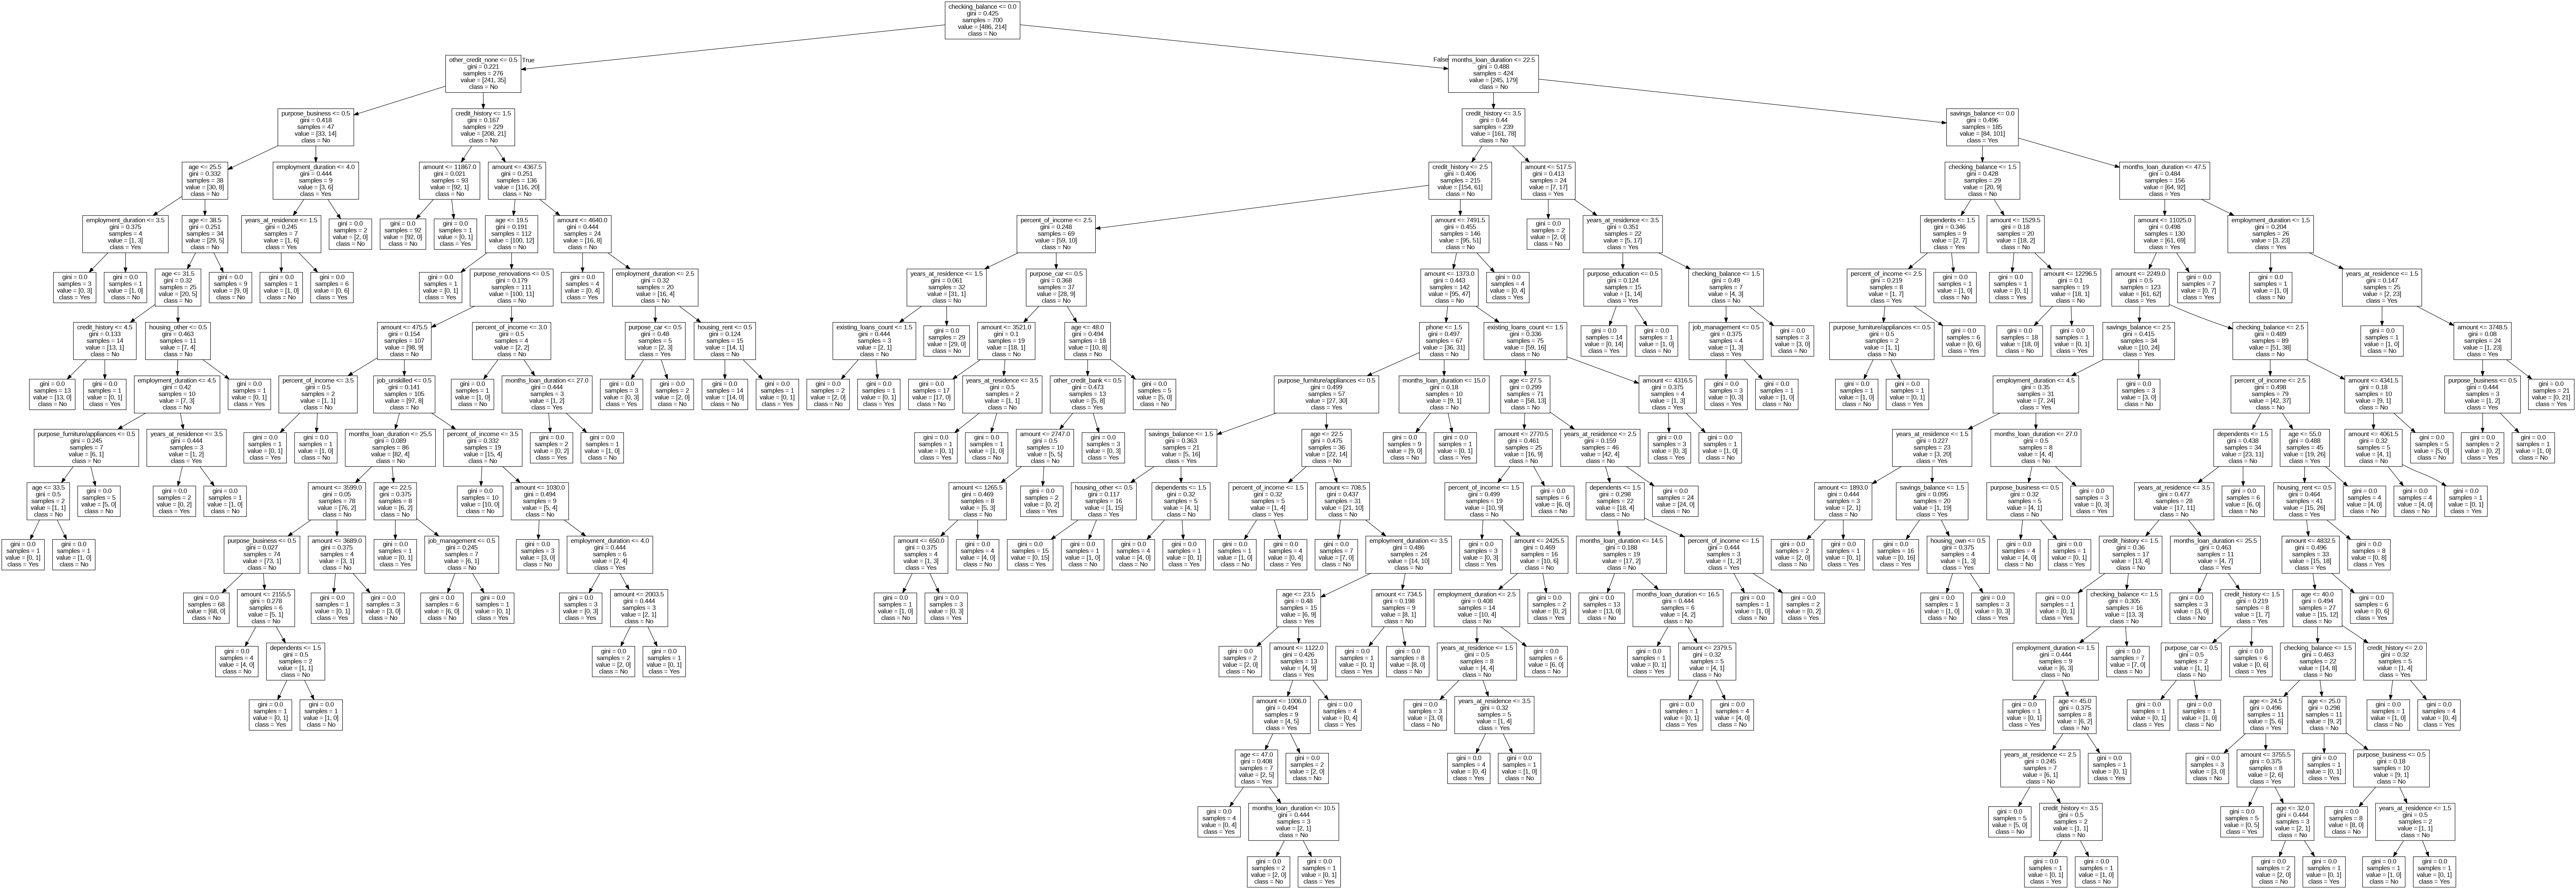

In [ ]:
#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))


In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtree,filled=True) # becuase gini is used, values range between 0-0.25

In [ ]:
# from sklearn import tree
# clf = tree.DecisionTreeClassifier(random_state=0) #random_state =0 ,because i should get optimal/same model everytime
# clf.fit(x_train,y_train)
# y_train_pred = clf.predict(x_train)
# y_test_pred = clf.predict(x_test)

# plt.figure(figsize=(40,20))
# features = df.columns #classification attributes
# classes = ['Not heart disease','heart disease']#target faeture
# tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
# plt.show()

## **Pre** Prunning: Reducing over fitting (Regularization)

# Pre pruning techniques

Pre pruning is nothing but stoping the growth of decision tree on an early stage. For that we can limit the growth of trees by setting constrains. We can limit parameters like max_depth , min_samples etc.

An effective way to do is that we can grid search those parameters and choose the optimum values that gives better performace on test data.

As of now we will control these parameters

max_depth: maximum depth of decision tree min_sample_split: The minimum number of samples required to split an internal node: min_samples_leaf: The minimum number of samples required to be at a leaf node.


In [ ]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)#to fit model with given constraints
gcv.fit(x_train,y_train)

In [ ]:
#CV=3 means if total dataset is 1000 - dataset if split in 200*5. 
#In CV1 - 1st 800 as train, last 200 as test/val --> scoring=accuracy ie here accuracy will be calculated for every cv1,2,3, and finally mean accuracy is calculated
#In CV2 , 1st 600 as train , next 200 as test/val , last 200 as train
# In CV3 , 1st 400 as train , next 200 as test/val , last 400 as train

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6],
    'max_features':['auto','sqrt','log2'],
    'ccp_alpha':[1,2,3,4,5,6]
}

dtree_pre = DecisionTreeClassifier(random_state=42)
gstree = GridSearchCV(dtree_pre,param_grid=parameters, cv=5, scoring='accuracy')
gstree.fit(X_train, y_train)


In [ ]:
gstree.best_params_

{'ccp_alpha': 1,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'auto',
 'splitter': 'best'}

In [ ]:
y_preds = gstree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
scores = accuracy_score(y_preds, y_test)
scores

0.7133333333333334

In [ ]:
dtree_pre = DecisionTreeClassifier(random_state=42, ccp_alpha=1,criterion='gini',max_depth=1,max_features='auto',splitter='best')
dtree_pre.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(ccp_alpha=1, max_depth=1, max_features='auto',
                       random_state=42)

In [ ]:
y_preds_new = gstree.predict(X_test)

In [ ]:
scores = accuracy_score(y_preds_new, y_test)
scores

0.7133333333333334

## **Post** Prunning: Reducing over fitting (Regularization)

In [ ]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.7528571428571429
0.7433333333333333


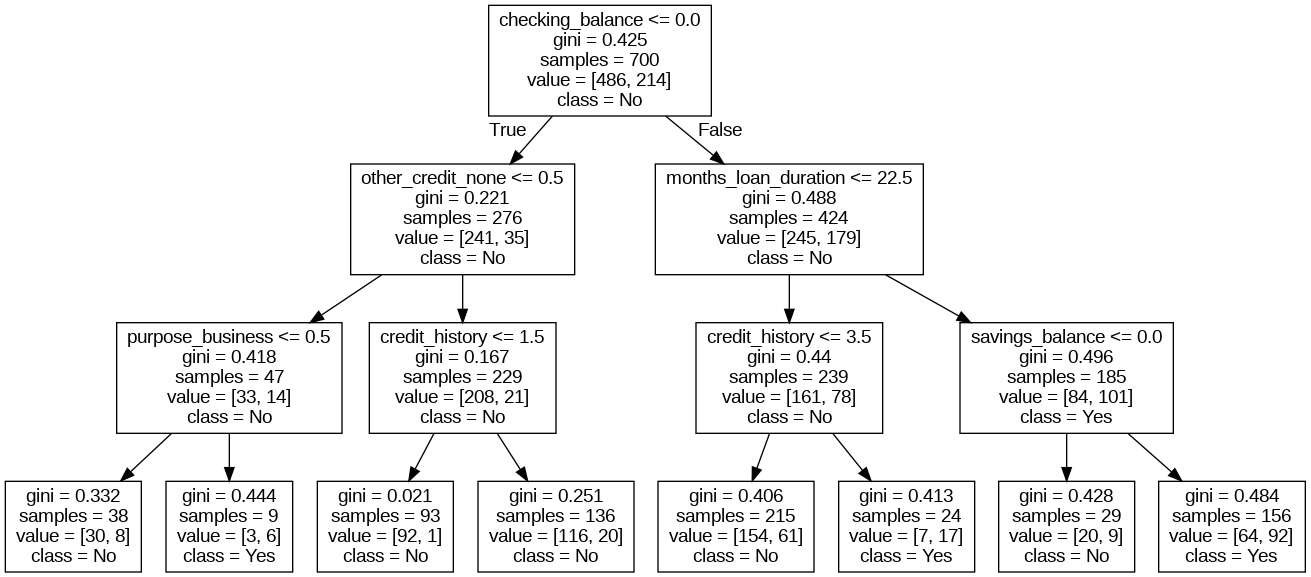

In [ ]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))



In [ ]:
# plt.figure(figsize=(20,20))
# classes = ['Not heart disease','heart disease']
# tree.plot_tree(model,feature_names=df.columns,class_names=classes,filled=True)
# plt.show()

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Importance"], index = X_train.columns))
#decision tree takes time to exexute so above code gives only imp columns feature importance wise

                              Importance
checking_balance                0.492510
months_loan_duration            0.169806
credit_history                  0.166109
amount                          0.000000
savings_balance                 0.064467
employment_duration             0.000000
percent_of_income               0.000000
years_at_residence              0.000000
age                             0.000000
existing_loans_count            0.000000
dependents                      0.000000
phone                           0.000000
purpose_business                0.051129
purpose_car                     0.000000
purpose_car0                    0.000000
purpose_education               0.000000
purpose_furniture/appliances    0.000000
purpose_renovations             0.000000
housing_other                   0.000000
housing_own                     0.000000
housing_rent                    0.000000
other_credit_bank               0.000000
other_credit_none               0.055977
other_credit_sto

0.7433333333333333


<Axes: >

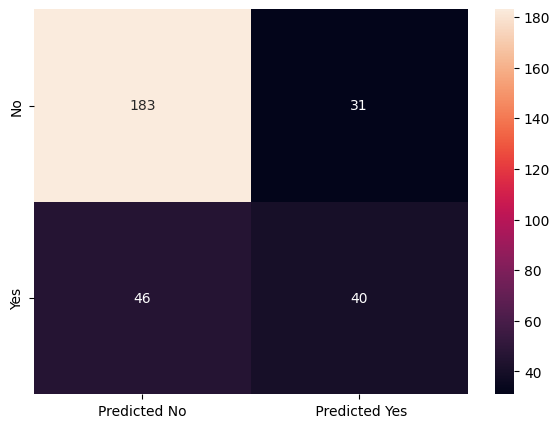

In [ ]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [ ]:
y_pred = dTreeR.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_pred, y_test)
score

0.7433333333333333

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       229
           1       0.47      0.56      0.51        71

    accuracy                           0.74       300
   macro avg       0.66      0.68      0.67       300
weighted avg       0.76      0.74      0.75       300





```
# This is formatted as code
```

Post Pruning using Cost Complexity Pruning


# 2. Post pruning techniques

There are several post pruning techniques. Cost complexity pruning is one of the important among them.

Cost Complexity Pruning Decision trees can easily overfit. One way to avoid it is to limit the growth of trees by setting constrains. We can limit parameters like max_depth , min_samples etc. But a most effective way is to use post pruning methods like cost complexity pruning. This helps to improve test accuracy and get a better model.

Cost complexity pruning is all about finding the right parameter for alpha.We will get the alpha values for this tree and will check the accuracy with the pruned trees.


In [ ]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

In [ ]:
# # For each alpha we will append our model to a list
# clfs = []
# for ccp_alpha in ccp_alphas:
#     clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
#     clf.fit(x_train, y_train)
#     clfs.append(clf)

In [ ]:
# clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.0150)
# clf_.fit(x_train,y_train)
# y_train_pred = clf_.predict(x_train)
# y_test_pred = clf_.predict(x_test)

# print(f'Train score {accuracy_score(y_train_pred,y_train)}')
# print(f'Test score {accuracy_score(y_test_pred,y_test)}')
# plot_confusionmatrix(y_train_pred,y_train,dom='Train')
# plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [ ]:
# plt.figure(figsize=(20,20))
# features = df.columns
# classes = ['Not heart disease','heart disease']
# tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
# plt.show()

In [ ]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

Automatically created module for IPython interactive environment


In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8811188811188811

[Text(0.5595238095238095, 0.9444444444444444, 'x[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.35714285714285715, 0.8333333333333334, 'x[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(0.23809523809523808, 0.7222222222222222, 'x[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(0.14285714285714285, 0.6111111111111112, 'x[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(0.09523809523809523, 0.5, 'x[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(0.047619047619047616, 0.3888888888888889, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(0.14285714285714285, 0.3888888888888889, 'x[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(0.09523809523809523, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.19047619047619047, 0.2777777777777778, 'x[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(0.14285714285714285, 0.166666666666

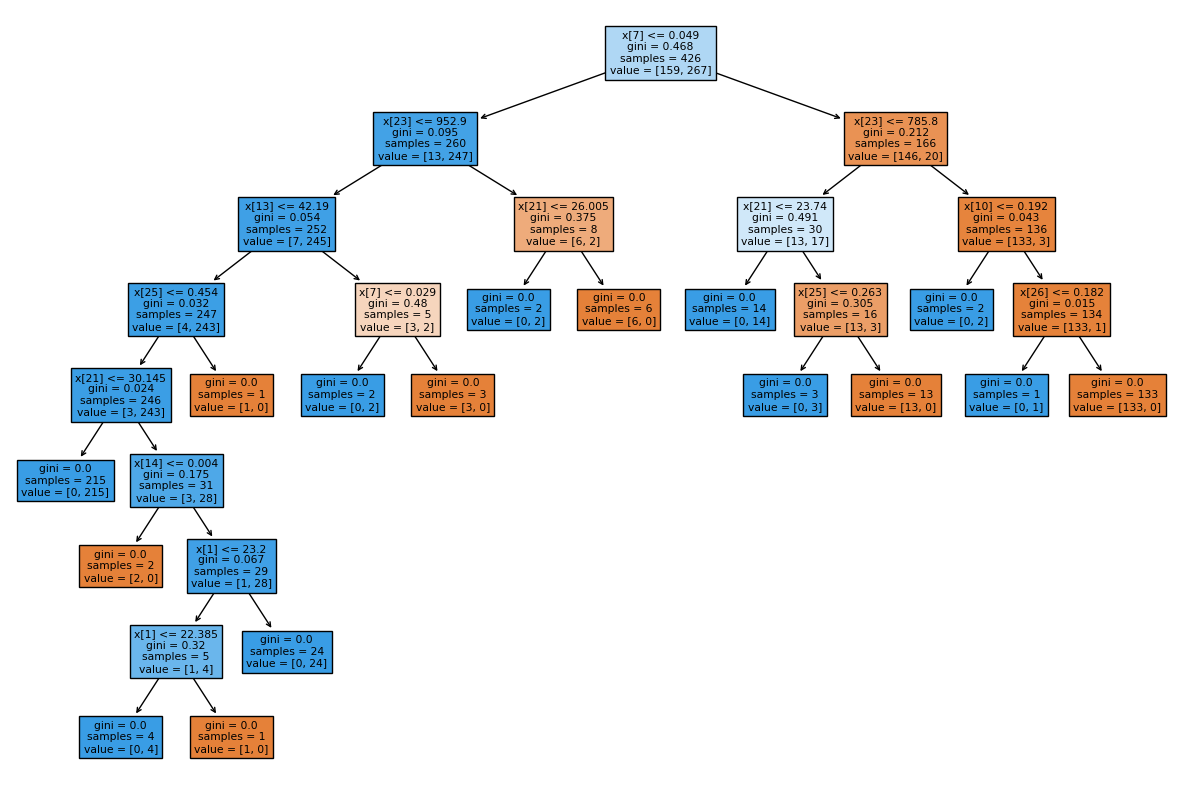

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities 
# ccp_alphas will tell us till what depth tree needs to be constructed, it is going to find weak points

In [ ]:
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


In [ ]:
print(clfs)

[DecisionTreeClassifier(random_state=0), DecisionTreeClassifier(ccp_alpha=0.0022664723976040134, random_state=0), DecisionTreeClassifier(ccp_alpha=0.004647426339100881, random_state=0), DecisionTreeClassifier(ccp_alpha=0.004659799593581376, random_state=0), DecisionTreeClassifier(ccp_alpha=0.005633802816901408, random_state=0), DecisionTreeClassifier(ccp_alpha=0.007042253521126761, random_state=0), DecisionTreeClassifier(ccp_alpha=0.007841938420144537, random_state=0), DecisionTreeClassifier(ccp_alpha=0.009114019793328328, random_state=0), DecisionTreeClassifier(ccp_alpha=0.011443661971830986, random_state=0), DecisionTreeClassifier(ccp_alpha=0.018988002086593604, random_state=0), DecisionTreeClassifier(ccp_alpha=0.023141627543035996, random_state=0), DecisionTreeClassifier(ccp_alpha=0.03422474765119576, random_state=0), DecisionTreeClassifier(ccp_alpha=0.3272984419327777, random_state=0)]


For the remainder of this example, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

Accuracy vs alpha for training and testing sets
When ccp_alpha is set to zero and keeping the other default parameters of :class:DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.015 maximizes the testing accuracy.

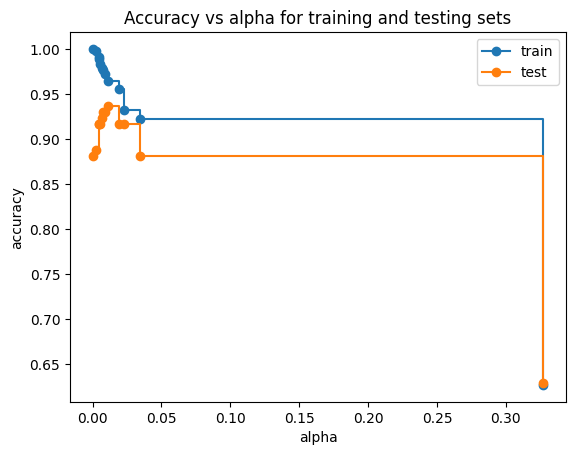

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
#When alpha value is 0 training accuracy was 1 and overfitting is happening, we need to find alpha value where training and test accuracy is almost same

In [ ]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)

In [ ]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9370629370629371

[Text(0.5, 0.875, 'x[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.25, 0.625, 'x[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(0.125, 0.375, 'gini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(0.375, 0.375, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.75, 0.625, 'x[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(0.625, 0.375, 'x[21] <= 23.74\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.75, 0.125, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(0.875, 0.375, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

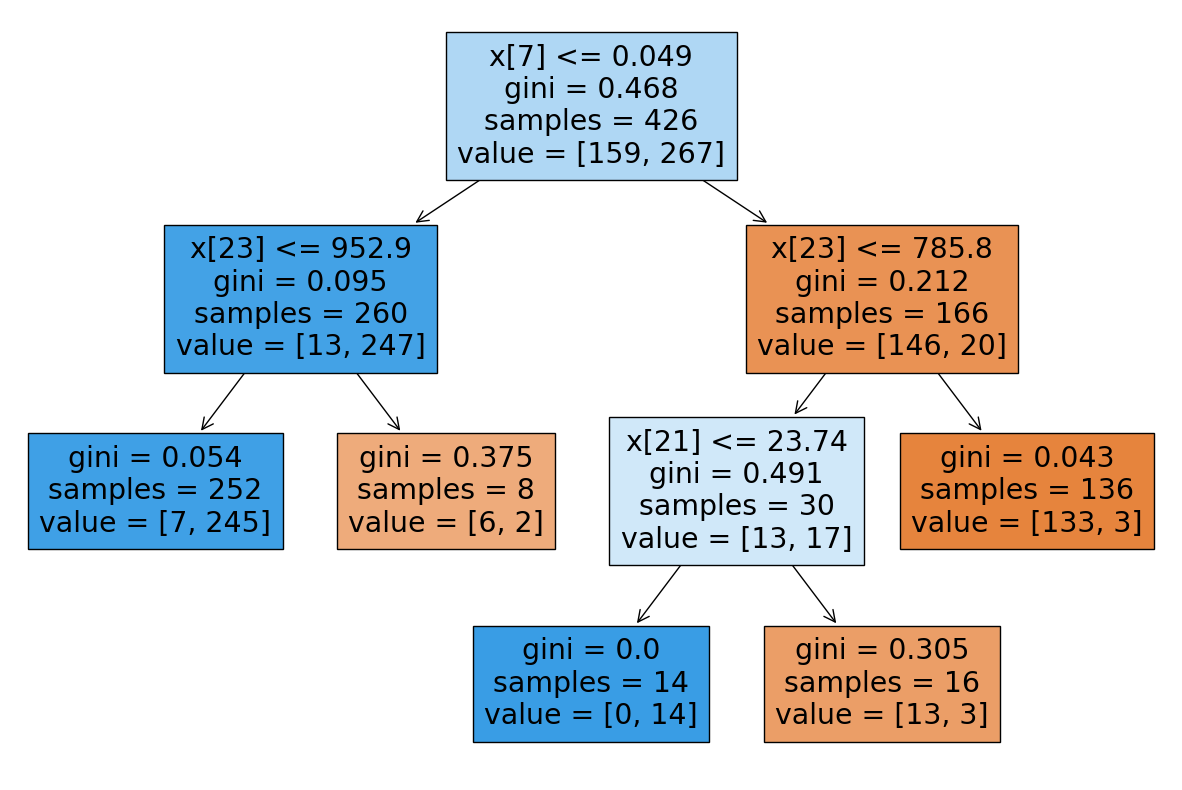

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [ ]:
#from 8 depth to 3 using ccp_alphas

In [ ]:
from sklearn.model_selection import cross_val_score

# With accuracy and cross-validation
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100}%")
    print(f"Cross-validation score: {np.mean(cross_val_score(model, X, y, cv=5)) * 100}%")
    print("")

# Another way to do it with GridSearchCV...
np.random.seed(42)
from sklearn.model_selection import GridSearchCV
# Define the parameters to search over
param_grid = {'n_estimators': [i for i in range(10, 100, 10)]}
# Setup the grid search
grid = GridSearchCV(RandomForestClassifier(),param_grid,cv=5)
# Fit the grid search to the data
grid.fit(X, y)
# Find the best parameters
grid.best_params_

# Set the model to be the best estimator
clf = grid.best_estimator_

# Fit the best model
clf = clf.fit(X_train, y_train)
# Find the best model scores
clf.score(X_test, y_test)

#loaded_model = pickle.load(open("random_forest_model_1.pkl","rb")) #read binary
#loaded_model.score(X_test,y_test) # it will load last model(90 estimators at 77.05%)

#import warnings
#warnings.filterwarnings('ignore') #will ingnore all future warnings. use wisely. can use 'default' to get exact warning
#warnings.filterwarnings('default')

#                             Ensemble Learning - Bagging

Builds on complex models and helps to avoid Overfitting. It samples the dataset to feed to each weak learner in parallel and uses voting mechanism to provide the final output.

In [ ]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dtree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1) #base_estimator skips meaningit will create 50 base trees

bgcl = bgcl.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.7733333333333333


<AxesSubplot:>

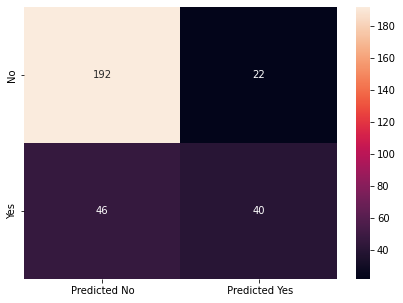

In [ ]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



#Ensemble Learning - AdaBoosting

Here it builds on simple models and each model builds on the errors or residuals of the previous model in sequence. If you try to use the complex base model base_estimator=dTree, you will realise that it does quite poor, this is because the first model in the sequence does really well and the rest of the models does not really have much to do and they end up hurting the first model instead of helping. You can rather use the base_estimator=dTreeR which is a simple model and you will realise some improvement.

The best approach is to leave the AdaBoost to figure it out and start with very simple base model with a depth of 1.


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)


0.74


<AxesSubplot:>

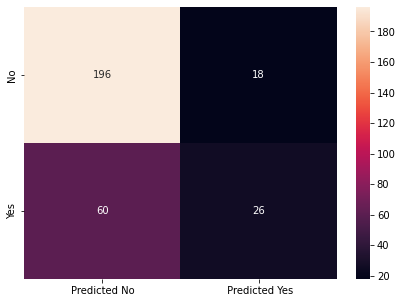

In [ ]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



#Ensemble Learning - GradientBoost

Gradient Boost also uses simple base leaners. The first base learner tries to predict our target (Y) and gives us (y_hat) and the next model tries to predict the difference between Y and y_hat, (Y -- y_hat), which is basically the residuals. Third model tries to predict the residuals from the second model and so on...

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1) # try adding base_estimator=dTree, accuracy decreases
gbcl = gbcl.fit(X_train, y_train)

0.74


<AxesSubplot:>

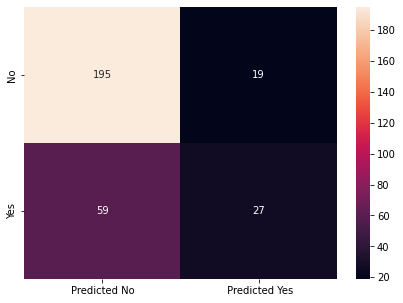

In [ ]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#Ensemble Learning - XGBoost - It is an extension of the Gradient Boost technique.

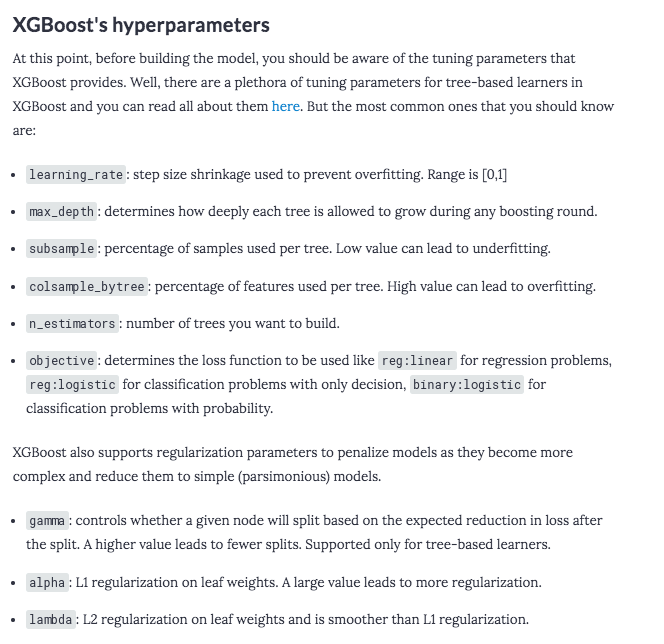




In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier() 
xgb.fit(X_train, y_train)

y_predict = xgb.predict(X_test)
print(xgb.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


ValueError: ignored

You can perform hyperparameter tuning on the XGBoost model to get a better score.

In [ ]:
#NewDataSet
df=pd.read_csv('Churn_Modelling.csv')


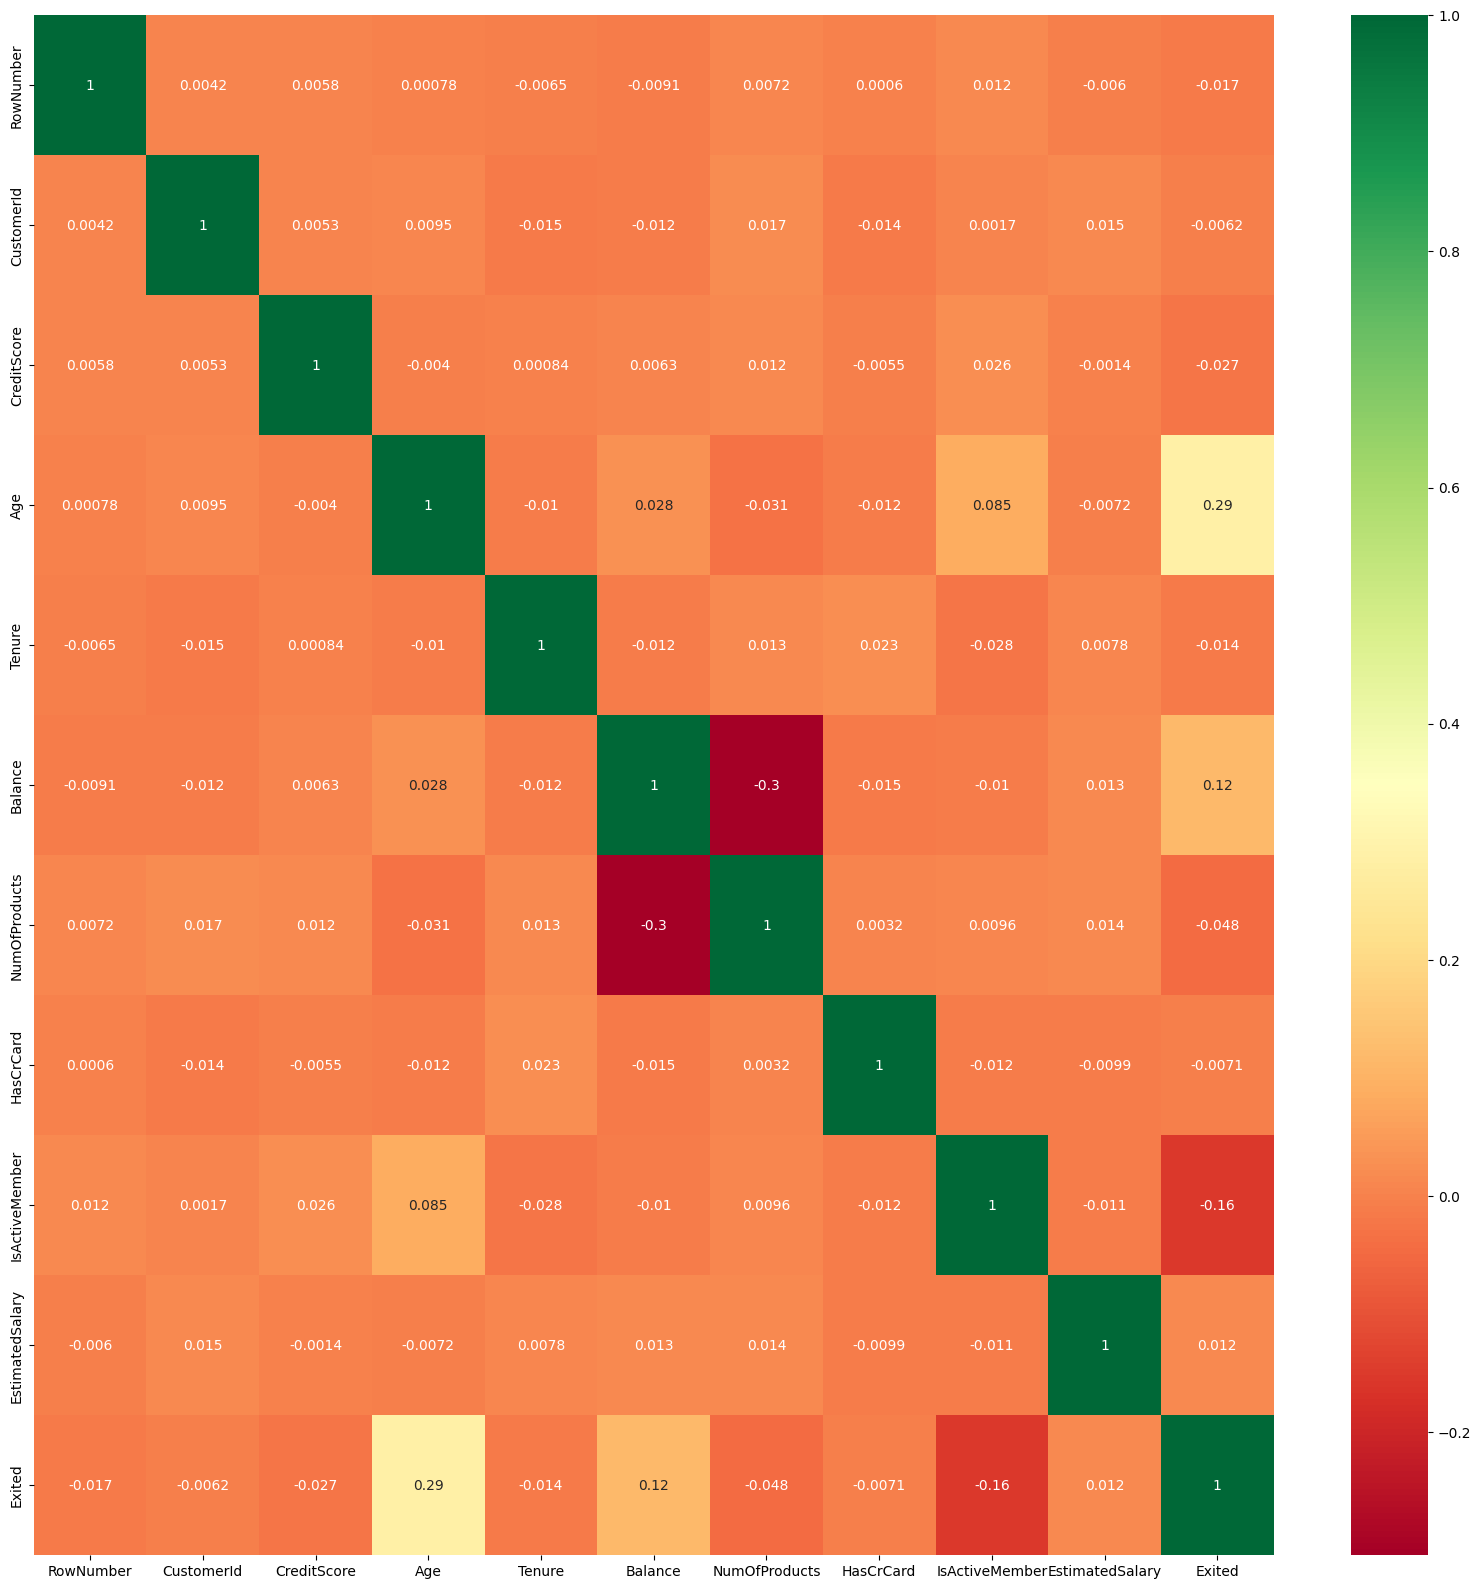

In [ ]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#Get the Independent and Dependent Features
X=df.iloc[:,3:13]
Y=df.iloc[:,13]

geography=pd.get_dummies(X['Geography'],drop_first=True)
geography.head()

Germany  Spain
0        0      0
1        0      1
2        0      0
3        0      0
4        0      1

In [ ]:
gender=pd.get_dummies(X['Gender'],drop_first=True)
gender.head()

Male
0     0
1     0
2     0
3     0
4     0

In [ ]:
## Drop Categorical Features
X=X.drop(['Geography','Gender'],axis=1)
X.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  
0               1        101348.88  
1               1        112542.58  
2               0        113931.57  
3               0         93826.63  
4               1         79084.10

In [ ]:
X=pd.concat([X,geography,gender],axis=1)
X.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Germany  Spain  Male  
0               1        101348.88        0      0     0  
1               1        112542.58        0      1     0  
2               0        113931.57        0      0     0  
3               0         93826.63        0      0     0  
4               1         79084.10        0      1     0

In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


classifier=xgboost.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
#n_iter is how many iteration of random parameters
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,Y)
timer(start_time) # timing ends here for "start_time" variable

X.head()

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 39.55 seconds.


CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Germany  Spain  Male  
0               1        101348.88        0      0     0  
1               1        112542.58        0      1     0  
2               0        113931.57        0      0     0  
3               0         93826.63        0      0     0  
4               1         79084.10        0      1     0

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)


from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,Y,cv=10)

score

[17:39:54] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1525, in predict
    class_probs = super().predict(
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1114, in predict
    predts = self.get_booster().inplace_predict(
  File "/usr/local/lib/python3.9/dist-pack

[17:39:55] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1525, in predict
    class_probs = super().predict(
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1114, in predict
    predts = self.get_booster().inplace_predict(
  File "/usr/local/lib/python3.9/dist-pack

[17:39:57] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1525, in predict
    class_probs = super().predict(
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1114, in predict
    predts = self.get_booster().inplace_predict(
  File "/usr/local/lib/python3.9/dist-pack

[17:39:59] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1525, in predict
    class_probs = super().predict(
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1114, in predict
    predts = self.get_booster().inplace_predict(
  File "/usr/local/lib/python3.9/dist-pack

[17:40:00] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1525, in predict
    class_probs = super().predict(
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1114, in predict
    predts = self.get_booster().inplace_predict(
  File "/usr/local/lib/python3.9/dist-pack

[17:40:01] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1525, in predict
    class_probs = super().predict(
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1114, in predict
    predts = self.get_booster().inplace_predict(
  File "/usr/local/lib/python3.9/dist-pack

[17:40:02] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1525, in predict
    class_probs = super().predict(
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1114, in predict
    predts = self.get_booster().inplace_predict(
  File "/usr/local/lib/python3.9/dist-pack

[17:40:03] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[17:40:03] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1525, in predict
    class_probs = super().predict(
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1114, in predict
    predts = self.get_booster().inplace_predict(
  File "/usr/local/lib/python3.9/dist-pack

[17:40:04] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1525, in predict
    class_probs = super().predict(
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1114, in predict
    predts = self.get_booster().inplace_predict(
  File "/usr/local/lib/python3.9/dist-pack

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

# Ensemble RandomForest Classifier

In random forest we subset the rows to create different trees. Again while building the tree, we again randomly subset the initial subset to grow the tree further.

It needs to start with a complex model since it is a Bagging technique, so if you start with a simple tree with a depth of say 3, you will realise that the score will decrease. As you increase the depth, the performance will increase as well. At some point the depth wouldn't matter to improve the performance anymore, even if you increase it. It is therefore advisable to allow the algorithm to choose the best depth by itself.


0.7766666666666666


<AxesSubplot:>

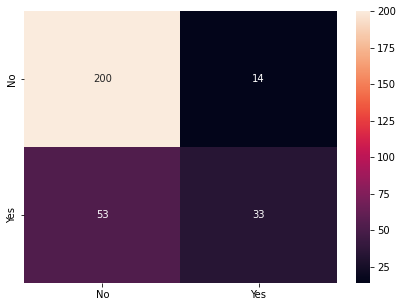

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12) # n_estimators is how many decision trees
rfcl = rfcl.fit(X_train, y_train)

y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
rfcl.estimators_ # will give indivdial DT as list

In [ ]:
from sklearn import tree

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(rfcl.estimators_[2], filled=True) # give 2nd DT


In [ ]:
for i in range(len(rfcl.estimators_)):
  print(tree.export_text(rfcl.estimators_[i]))

#ENSEMBLE MODEL: Stacking

In Bagging, we build models in parallel and combine the output using voting mechanism to get the final prediction.

In Boosting, we build models in sequennce and then keep on increasing the weight of wrongly classified items to increase their chance of being predicted right.


In Stacking, we stack several different models and use their predictions as target in our final model (also known as meta model).

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
import xgboost
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
df = datasets.load_breast_cancer()

In [ ]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
df.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
X = pd.DataFrame(columns = df.feature_names, data = df.data)
X

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [ ]:
y = df.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
target = {'target' : df.target}
y = pd.DataFrame(data = target)

In [ ]:
y = y['target']

#Stacking

In [ ]:
dtc =  DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn =  KNeighborsClassifier()
xgb = xgboost.XGBClassifier()
clf = [('dtc',dtc),('rfc',rfc),('knn',knn),('xgb',xgb)] #list of (str, estimator)



In [ ]:
lr = LogisticRegression()
stack_model = StackingClassifier( estimators = clf,final_estimator = lr)
score = cross_val_score(stack_model,X,y,cv = 5,scoring = 'accuracy')
print("The final accuracy score is: ",score.mean())

The final accuracy score is:  0.9701599130569786


##How to prevent Overfitting and Underfitting

In [ ]:
df = pd.read_csv('/content/fruit_dataset.csv')
df.head()

fruit_label fruit_name  mass  width  height  color_score
0            1      apple   192    8.4     7.3         0.55
1            1      apple   180    8.0     6.8         0.59
2            1      apple   176    7.4     7.2         0.60
3            2   mandarin    86    6.2     4.7         0.80
4            2   mandarin    84    6.0     4.6         0.79

In [ ]:
df['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
mango        2
Name: fruit_name, dtype: int64

In [ ]:
df['fruit_label'].value_counts()

1    19
3    19
4    16
2     5
5     2
Name: fruit_label, dtype: int64

In [ ]:
x = df.iloc[:,2:5]
y= df.iloc[:,0]

Preventing Overfitting:

**1. Using Cross validation:**

Cross validation is a very powerful preventive measure against overfitting, with a clever idea. Create multiple mini train-validation splits within the original train data, and use these to tune your model.

We have a standard way of doing so, called the “k-fold cross validation”. What we do here is, partition the dataset into k subsets which we call “folds”.

Then we iteratively train our model on k – 1 folds. Why? We keep the last one as a validation dataset. The last fold is called the “holdout fold”.

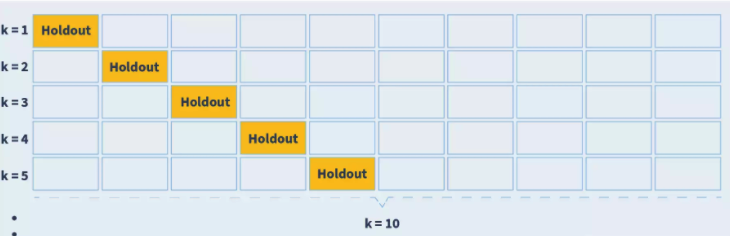



Using cross validation, you can tune your hyperparameters only with your original training dataset. This way, you can keep the validation set as a completely unseen dataset.

K-fold cross validation might not completely remove the overfitting, so we can change the folds every now and then, or use multiple k-fold cross validations together.

**2. Train with more data:**

The signal will be better detected by the algorithm if we train the model with more data. Although it doesn’t work every time, for example if we just add more noisy data, then this technique won’t help.

**3. Remove Features**

In algorithms that don’t have a built-in feature selection, their generalization can be manually improved by removing some irrelevant or unimportant features. Why is removing features helpful? Sometimes it may happen that the model may fail to generalize simply because the model missed the patterns that should have been detected, and the data was too complex for the same.

**4. Add Regularization:**

As we discussed earlier, that overfitting could be a consequence of the model being too complex. Can we forcefully make it simpler? Yes! Regularization is the term for a range of techniques that could be used to force your model into being simpler. The techniques used to regularize any model will depend on the model itself. For example, an option could be pruning a decision tree, on neural networks you could use a dropout, or, to the cost function in regression, a penalty parameter could be added. Confusing terms eh? Google them!



Identify Overfitting in Our Dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = .20, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn import metrics
lr.score(x_train, y_train)

0.7291666666666666

In [ ]:
lr.score(x_test, y_test)

0.46153846153846156

In [ ]:
df['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
mango        2
Name: fruit_name, dtype: int64

Solving Overfitting in Our Dataset : Train with more data

Resampling Techniques

We can change the dataset that we are using to build our predictive model to have more balanced data.

This approach is normally referred to as sampling the dataset. There are two main methods that are typically used.

    Upsampling/OverSampling
    DownSampling/UnderSampling

Since our dataset is small and we want to increase it we will use Upsampling/OverSampling techique:

HEre mandarin and mango are negligeble so model ignores them. We have to upsample these 2 dataset


In [ ]:
df.head()

fruit_label fruit_name  mass  width  height  color_score
0            1      apple   192    8.4     7.3         0.55
1            1      apple   180    8.0     6.8         0.59
2            1      apple   176    7.4     7.2         0.60
3            2   mandarin    86    6.2     4.7         0.80
4            2   mandarin    84    6.0     4.6         0.79

In [ ]:
#Upsampling mandarin
from sklearn.utils import resample

mandarin = df[df['fruit_label']==2] #5
apple = df[df['fruit_label']==1] #19

#We want upsampling like apple values 

mandarin_data_upsampled = resample(mandarin,                    
            replace=True, # sample with replacement ie take mandarin and apple dataset, keep onadding and removing data from 2 bags to match the rows
            n_samples = len(apple)-5,#len(apple), # match number in majority class, -5 else 19+5=24 will be rows in mandarin
            random_state=42 )

In [ ]:
mandarin_data_upsampled = mandarin_data_upsampled.reset_index(drop=True)
mandarin_data_upsampled

fruit_label fruit_name  mass  width  height  color_score
0             2   mandarin    80    5.9     4.3         0.81
1             2   mandarin    76    5.8     4.0         0.81
2             2   mandarin    80    5.8     4.3         0.77
3             2   mandarin    76    5.8     4.0         0.81
4             2   mandarin    76    5.8     4.0         0.81
5             2   mandarin    84    6.0     4.6         0.79
6             2   mandarin    80    5.8     4.3         0.77
7             2   mandarin    80    5.8     4.3         0.77
8             2   mandarin    80    5.8     4.3         0.77
9             2   mandarin    76    5.8     4.0         0.81
10            2   mandarin    80    5.9     4.3         0.81
11            2   mandarin    80    5.8     4.3         0.77
12            2   mandarin    76    5.8     4.0         0.81
13            2   mandarin    84    6.0     4.6         0.79

In [ ]:
df_new = [df,mandarin_data_upsampled]
df = pd.concat(df_new,axis=0)
df

fruit_label fruit_name  mass  width  height  color_score
0             1      apple   192    8.4     7.3         0.55
1             1      apple   180    8.0     6.8         0.59
2             1      apple   176    7.4     7.2         0.60
3             2   mandarin    86    6.2     4.7         0.80
4             2   mandarin    84    6.0     4.6         0.79
..          ...        ...   ...    ...     ...          ...
9             2   mandarin    76    5.8     4.0         0.81
10            2   mandarin    80    5.9     4.3         0.81
11            2   mandarin    80    5.8     4.3         0.77
12            2   mandarin    76    5.8     4.0         0.81
13            2   mandarin    84    6.0     4.6         0.79

[75 rows x 6 columns]

In [ ]:
df['fruit_name'].value_counts()

apple       19
mandarin    19
orange      19
lemon       16
mango        2
Name: fruit_name, dtype: int64

In [ ]:
df['fruit_label'].value_counts()

1    19
2    19
3    19
4    16
5     2
Name: fruit_label, dtype: int64

In [ ]:
len(df[df['fruit_label']==1])

19

In [ ]:
#Same for mango
from sklearn.utils import resample
mango = df[df['fruit_label']==5]
apple = df[df['fruit_label']==1]

mango_upsampled = resample(mango, replace=True, n_samples= len(apple)-2 ,random_state=42 )

In [ ]:
mango_upsampled

fruit_label fruit_name  mass  width  height  color_score
59            5      mango   201    7.7   10.10         0.71
60            5      mango   209    8.1   12.11         0.78
59            5      mango   201    7.7   10.10         0.71
59            5      mango   201    7.7   10.10         0.71
59            5      mango   201    7.7   10.10         0.71
60            5      mango   209    8.1   12.11         0.78
59            5      mango   201    7.7   10.10         0.71
59            5      mango   201    7.7   10.10         0.71
59            5      mango   201    7.7   10.10         0.71
60            5      mango   209    8.1   12.11         0.78
59            5      mango   201    7.7   10.10         0.71
59            5      mango   201    7.7   10.10         0.71
59            5      mango   201    7.7   10.10         0.71
59            5      mango   201    7.7   10.10         0.71
60            5      mango   209    8.1   12.11         0.78
59            5      mango   201    7.7   10.10         0.71
60            5      mango   209    8.1   12.11         0.78

In [ ]:
mango_data_upsampled = mango_upsampled.reset_index(drop=True)

In [ ]:
Frame =[df,mango_data_upsampled]

df = pd.concat(Frame,axis = 0)

df

fruit_label fruit_name  mass  width  height  color_score
0             1      apple   192    8.4    7.30         0.55
1             1      apple   180    8.0    6.80         0.59
2             1      apple   176    7.4    7.20         0.60
3             2   mandarin    86    6.2    4.70         0.80
4             2   mandarin    84    6.0    4.60         0.79
..          ...        ...   ...    ...     ...          ...
12            5      mango   201    7.7   10.10         0.71
13            5      mango   201    7.7   10.10         0.71
14            5      mango   209    8.1   12.11         0.78
15            5      mango   201    7.7   10.10         0.71
16            5      mango   209    8.1   12.11         0.78

[92 rows x 6 columns]

In [ ]:
df['fruit_name'].value_counts()

apple       19
mandarin    19
orange      19
mango       19
lemon       16
Name: fruit_name, dtype: int64

In [ ]:
x = df.iloc[:,2:5]
y= df.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = .20, random_state=1)



In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn import metrics


print('training score: ',lr.score(x_train,y_train))
print('test score: ',lr.score(x_test,y_test))

training score:  0.7945205479452054
test score:  0.7368421052631579


<br>

<br>




#**Preventing Underfitting:**

**1. Increasing the Complexity of the model:**

A probable cause of underfitting could be the fact that the model is not complex enough to understand the underlying patterns in data. Making the switch to say, a non-linear model from a linear model or, say, by adding more hidden layers to your existing neural network could be ways to make the model more complex, and in turn could help in removal of underfitting.

**2. Reducing Regularization:**

Well, underfitting is somewhat close to the opposite of overfitting. So, as we read earlier, regularization could help solve the overfitting problem, then reducing it could solve the underfitting problem! Some of the algorithms you use by default include some regularization parameters meant to suppress overfitting. Sometimes, these could also cause hindrance in the learning of the algorithm. Decreasing their values for the most part, makes a difference. You must be thinking, that if underfitting is almost the opposite of overfitting, then maybe adding more features or data would help solve the problem? NO! If the dataset lacks features that are decisive, and important that could help your model in detecting patterns, you can multiply the training data set by 2 or 5, or even 10, but it will not help in making your algorithm better. It is a common notion to think that throwing more data would solve the problem, but as stated earlier, it might just jeopardize the project.

In [ ]:
weather_data_p = pd.read_csv('/content/WeatherDataP.csv')
weather_data_p

Pressure (millibars)  Humidity
0                1014.40      0.62
1                1014.20      0.66
2                1014.47      0.79
3                1014.45      0.82
4                1014.49      0.83
5                1014.52      0.85
6                1014.16      0.83
7                1014.24      0.78
8                1014.25      0.72
9                1013.96      0.61
10               1013.85      0.52
11               1013.04      0.46
12               1012.22      0.40
13               1011.44      0.40
14               1010.52      0.37
15               1009.83      0.40
16               1009.26      0.36
17               1008.76      0.43
18               1008.36      0.50
19               1008.11      0.53
20               1008.15      0.55
21               1007.85      0.58
22               1007.89      0.59
23               1007.36      0.60
24               1007.26      0.63

In [ ]:
x = weather_data_p[['Pressure (millibars)']]
y = weather_data_p.Humidity

In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train,y_test =train_test_split(x,y, test_size=.20, random_state=1)


In [ ]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn import metrics

print('training score: ',lr.score(x_train,y_train))
print('test score: ',lr.score(x_test,y_test))

training score:  0.29065760334760526
test score:  0.14324706577023627


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


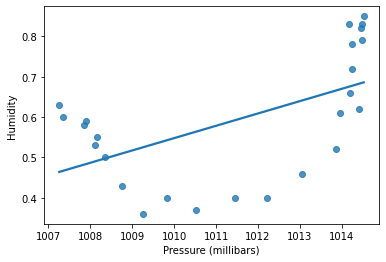

In [ ]:
import seaborn as sns

sns.regplot(x,y,ci = None) #confidence interval
plt.show()

Increase the model Complexity

We will move from just linear features to Polynomial features.

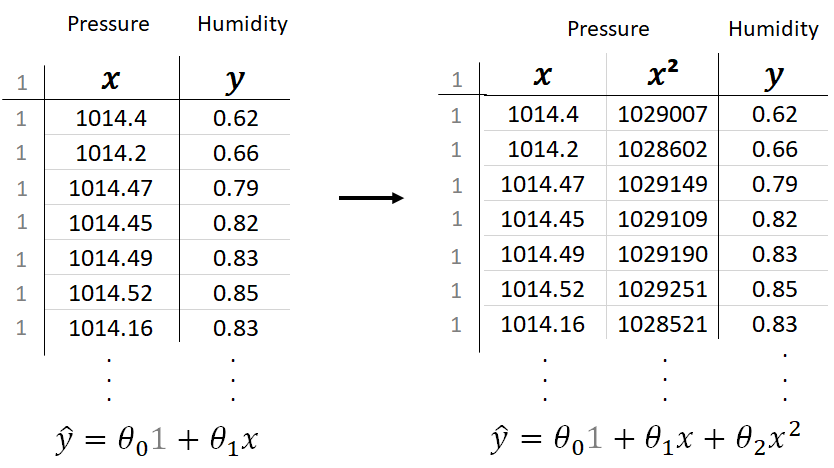

Notice that there is a hidden column of 1’s which can be thought of as the variable associated with θ₀. Since θ₀ × 1 = θ₀ this is often left out.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pre_process = PolynomialFeatures(degree = 2)

x_poly = pre_process.fit_transform(x)

x_poly

array([[1.00000000e+00, 1.01440000e+03, 1.02900736e+06],
       [1.00000000e+00, 1.01420000e+03, 1.02860164e+06],
       [1.00000000e+00, 1.01447000e+03, 1.02914938e+06],
       [1.00000000e+00, 1.01445000e+03, 1.02910880e+06],
       [1.00000000e+00, 1.01449000e+03, 1.02918996e+06],
       [1.00000000e+00, 1.01452000e+03, 1.02925083e+06],
       [1.00000000e+00, 1.01416000e+03, 1.02852051e+06],
       [1.00000000e+00, 1.01424000e+03, 1.02868278e+06],
       [1.00000000e+00, 1.01425000e+03, 1.02870306e+06],
       [1.00000000e+00, 1.01396000e+03, 1.02811488e+06],
       [1.00000000e+00, 1.01385000e+03, 1.02789182e+06],
       [1.00000000e+00, 1.01304000e+03, 1.02625004e+06],
       [1.00000000e+00, 1.01222000e+03, 1.02458933e+06],
       [1.00000000e+00, 1.01144000e+03, 1.02301087e+06],
       [1.00000000e+00, 1.01052000e+03, 1.02115067e+06],
       [1.00000000e+00, 1.00983000e+03, 1.01975663e+06],
       [1.00000000e+00, 1.00926000e+03, 1.01860575e+06],
       [1.00000000e+00, 1.00876

In [ ]:
df_x_poly = pd.DataFrame(x_poly)
df_x_poly.columns = ['1','x','x_squared']
df_x_poly

1        x     x_squared
0   1.0  1014.40  1.029007e+06
1   1.0  1014.20  1.028602e+06
2   1.0  1014.47  1.029149e+06
3   1.0  1014.45  1.029109e+06
4   1.0  1014.49  1.029190e+06
5   1.0  1014.52  1.029251e+06
6   1.0  1014.16  1.028521e+06
7   1.0  1014.24  1.028683e+06
8   1.0  1014.25  1.028703e+06
9   1.0  1013.96  1.028115e+06
10  1.0  1013.85  1.027892e+06
11  1.0  1013.04  1.026250e+06
12  1.0  1012.22  1.024589e+06
13  1.0  1011.44  1.023011e+06
14  1.0  1010.52  1.021151e+06
15  1.0  1009.83  1.019757e+06
16  1.0  1009.26  1.018606e+06
17  1.0  1008.76  1.017597e+06
18  1.0  1008.36  1.016790e+06
19  1.0  1008.11  1.016286e+06
20  1.0  1008.15  1.016366e+06
21  1.0  1007.85  1.015762e+06
22  1.0  1007.89  1.015842e+06
23  1.0  1007.36  1.014774e+06
24  1.0  1007.26  1.014573e+06

Implementing Polynomial Regression

The method here remains the same as multiple linear regression in python, but here we are fitting our regression model on the polynomial features.


In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train,y_test =train_test_split(x_poly,y, test_size=.20, random_state=1)


In [ ]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_poly)

In [ ]:
from sklearn import metrics

print('training score: ',lr.score(x_train,y_train))
print('test score: ',lr.score(x_test,y_test))

training score:  0.8212622197151398
test score:  0.9427391324681367


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


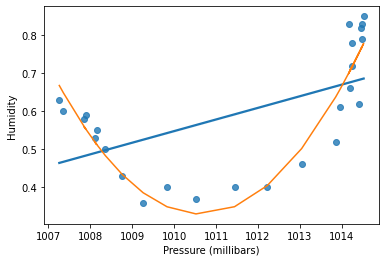

In [ ]:
import seaborn as sns

sns.regplot(x,y,fit_reg=True, ci = True)
plt.plot(x,y_pred)
plt.show()

#Handling Imbalanced Dataset - Under Sampling
If 1's are 800 and 0's are 100 , we take random 100 records of 1's so that both 0's and 1's have 100 records each

Do Under Sampling is records are huge. 
Where will we find such records - 1. Medical Records ratio is not maintained , 2. Credit Card Fraud ratio will be also less


In [ ]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14,8
random_seed =42
labels = ['Normal','Fraud']


In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62    0.0  
1  0.125895 -0.008983  0.014724    2.69    0.0  
2 -0.139097 -0.055353 -0.059752  378.66    0.0  
3 -0.221929  0.062723  0.061458  123.50    0.0  
4  0.502292  0.219422  0.215153   69.99    0.0  

[5 rows x 31 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1986 non-null   int64  
 1   V1      1986 non-null   float64
 2   V2      1986 non-null   float64
 3   V3      1986 non-null   float64
 4   V4      1986 non-null   float64
 5   V5      1986 non-null   float64
 6   V6      1986 non-null   float64
 7   V7      1986 non-null   float64
 8   V8      1986 non-null   float64
 9   V9      1986 non-null   float64
 10  V10     1986 non-null   float64
 11  V11     1986 non-null   float64
 12  V12     1986 non-null   float64
 13  V13     1986 non-null   float64
 14  V14     1985 non-null   float64
 15  V15     1985 non-null   float64
 16  V16     1985 non-null   float64
 17  V17     1985 non-null   float64
 18  V18     1985 non-null   float64
 19  V19     1985 non-null   float64
 20  V20     1985 non-null   float64
 21  V21     1985 non-null   float64
 22  

In [ ]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
#X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(1986, 30)
(1986,)


In [ ]:
df.isnull().values.any()

True

Text(0, 0.5, 'Frequency')

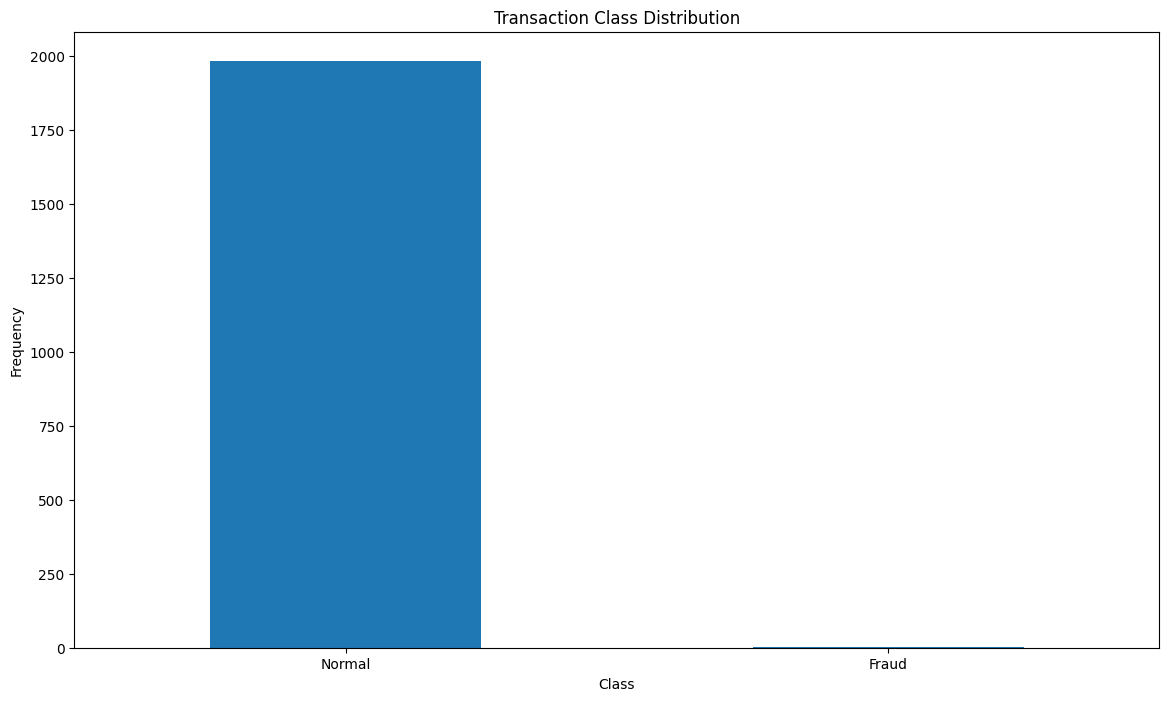

In [ ]:
count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), labels)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]
print(fraud.shape,normal.shape)

(2, 31) (1983, 31)


In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss(random_state=42)
X_res,y_res=nm.fit_resample(X,Y)

In [ ]:
X_res.shape,y_res.shape

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Up Sampling

In [ ]:
from imblearn.combine import SMOTETomek #for oversampling
from imblearn.under_sampling import NearMiss # for undersampling

In [ ]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,Y)

In [ ]:
X_res.shape,y_res.shape

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))
# normal dataset ie non fraud + fraud is added then doubled then split into 2 for X and y
  # this is because we used imblearn.combine 

In [ ]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler(ratio=0.5)  # eg y {1:500, 0:100}. ratio=0.5 --> it will go to majority category then 0.5*500 = 250. So 100+150 = 250 given to 0

X_train_res, y_train_res = os.fit_sample(X, Y)
X_train_res.shape,y_train_res.shape

In [ ]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res))) # as 0.5, 1's are half of 0's

In [ ]:
# In this example I use SMOTETomek which is a method of imblearn. SMOTETomek is a hybrid method
# which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).
os_us = SMOTETomek(ratio=0.5)

X_train_res1, y_train_res1 = os_us.fit_sample(X, Y)

In [ ]:
X_train_res1.shape,y_train_res1.shape

In [ ]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res1)))

#Select the Right Threshold values using ROC Curve

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1) # n_classes =2 means output will be 0,1, weights are balanced

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)



In [ ]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9823111111111111


In [ ]:
ytrain_pred

array([[1.  , 0.  ],
       [0.98, 0.02],
       [0.  , 1.  ],
       ...,
       [0.98, 0.02],
       [0.97, 0.03],
       [0.24, 0.76]])

In [ ]:
#Logistics Regression
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


In [ ]:
#Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


In [ ]:
#KNNClassifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


In [ ]:
#Now we will focus on selecting the best threshold for maximum accuracy
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9851333333333333


In [ ]:
pd.concat(pred,axis=1) # mean of every single model is taken

0         1         2    3
0    1.00  0.991861  0.559186  1.0
1    0.01  0.000008  0.463282  0.0
2    0.98  0.966929  0.538202  0.8
3    0.96  0.761539  0.509875  0.8
4    0.60  0.779443  0.490344  0.4
..    ...       ...       ...  ...
595  0.00  0.024239  0.461121  0.0
596  0.04  0.000003  0.441377  0.0
597  1.00  0.984385  0.532403  1.0
598  0.01  0.001147  0.441720  0.2
599  0.98  0.989540  0.559890  0.8

[600 rows x 4 columns]

In [ ]:
final_prediction

0      0.887762
1      0.118323
2      0.821283
3      0.757853
4      0.567447
         ...   
595    0.121340
596    0.120345
597    0.879197
598    0.163217
599    0.832357
Length: 600, dtype: float64

In [ ]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds # it tells which all ROC curve could be considered

array([1.9109413 , 0.9109413 , 0.9085034 , 0.90827475, 0.80537052,
       0.80412833, 0.80306516, 0.8030558 , 0.78347738, 0.78321156,
       0.76797465, 0.76787124, 0.72675756, 0.72637362, 0.72157482,
       0.72143711, 0.65787883, 0.65493537, 0.61366701, 0.59925354,
       0.59212652, 0.59050386, 0.58745356, 0.58486186, 0.5846569 ,
       0.58364346, 0.56042732, 0.55469563, 0.54149047, 0.47616892,
       0.45669266, 0.44544916, 0.4421034 , 0.38818654, 0.38629719,
       0.34886723, 0.34836612, 0.23598126, 0.23140421, 0.19916474,
       0.19848417, 0.12551207, 0.1253351 , 0.10625332])

In [ ]:
from sklearn.metrics import accuracy_score # to select threshold ie best ROC curve that covers max area
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True) # top accuracy at the top
accuracy_ls.head()

thresholds  accuracy
31    0.445449  0.961667
32    0.442103  0.960000
30    0.456693  0.960000
28    0.541490  0.960000
27    0.554696  0.960000

In [ ]:
accuracy_ls

thresholds  accuracy
31    0.445449  0.961667
32    0.442103  0.960000
30    0.456693  0.960000
28    0.541490  0.960000
27    0.554696  0.960000
29    0.476169  0.958333
26    0.560427  0.958333
33    0.388187  0.950000
25    0.583643  0.950000
23    0.584862  0.950000
22    0.587454  0.948333
21    0.590504  0.948333
34    0.386297  0.948333
24    0.584657  0.948333
20    0.592127  0.946667
19    0.599254  0.945000
18    0.613667  0.943333
35    0.348867  0.940000
17    0.654935  0.938333
36    0.348366  0.938333
16    0.657879  0.936667
15    0.721437  0.913333
14    0.721575  0.911667
13    0.726374  0.906667
12    0.726758  0.905000
38    0.231404  0.875000
37    0.235981  0.875000
11    0.767871  0.855000
10    0.767975  0.853333
39    0.199165  0.843333
40    0.198484  0.841667
9     0.783212  0.838333
8     0.783477  0.836667
5     0.804128  0.811667
7     0.803056  0.811667
4     0.805371  0.810000
6     0.803065  0.810000
41    0.125512  0.685000
42    0.125335  0.683333
3     0.908275  0.508333
2     0.908503  0.506667
43    0.106253  0.501667
1     0.910941  0.500000
0     1.910941  0.500000

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

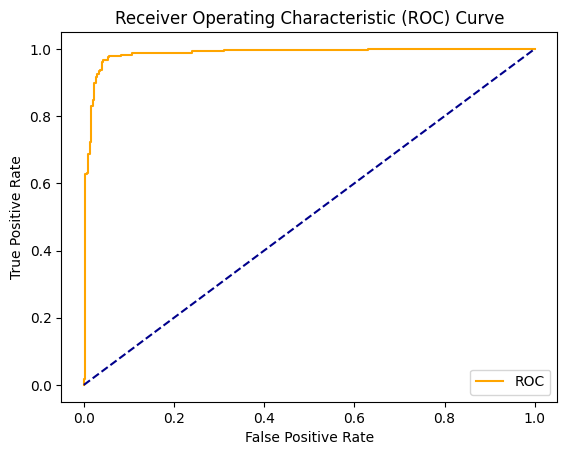

In [ ]:
plot_roc_curve(fpr,tpr)

#Before Feature Selection, Feature Engineering is mandatory

#1.Feature Selection- Dropping constant features

In this step we will be removing the features which have constant features which are actually not important for solving the problem statement



In [ ]:
# Import pandas to create DataFrame 
import pandas as pd 
  
# Make DataFrame of the given data 
data = pd.DataFrame({"A":[1,2,4,1,2,4], 
                    "B":[4,5,6,7,8,9], 
                    "C":[0,0,0,0,0,0], # same values
                    "D":[1,1,1,1,1,1]})  #same values


data.head()

A  B  C  D
0  1  4  0  1
1  2  5  0  1
2  4  6  0  1
3  1  7  0  1
4  2  8  0  1

Variance Threshold - to remove such features like C and D

Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [ ]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0) # threshold = 0 means all those columns having variance 0 remove it, 
  #increasing the threshold value will say if variance less than eg-0.2, remove it
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [ ]:
var_thres.get_support() # it states that A,B are non zero variance and C,D are zero variance

array([ True,  True, False, False])

In [ ]:
data.columns[var_thres.get_support()]

Index(['A', 'B'], dtype='object')

In [ ]:
constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]] # if column doesnt exist in A,B save it

print(len(constant_columns))

2


In [ ]:
for feature in constant_columns:
     print(feature)

C
D


In [ ]:
data.drop(constant_columns,axis=1)


A  B
0  1  4
1  2  5
2  4  6
3  1  7
4  2  8
5  4  9

In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [ ]:
df=pd.read_csv('santander.csv',nrows=10000) # take 10000 rows

In [ ]:
df.head()

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                        0                        0  ...   
1                        0                        0  ...   
2                        0                        0  ...   
3                        0                        0  ...   
4                        0                        0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3          var38  TARGET  
0                     0.0                     0.0   39205.170000       0  
1                     0.0                     0.0   49278.030000       0  
2                     0.0                     0.0   67333.770000       0  
3                     0.0                     0.0   64007.970000       0  
4                     0.0                     0.0  117310.979016       0  

[5 rows x 371 columns]

In [ ]:
df.shape

(10000, 371)

In [ ]:
X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']

from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape



((7000, 370), (3000, 370))

In [ ]:
#Lets apply the variance threshold

var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train) #fit on train , transfrom on test

var_thres.get_support()



array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
### Finding non constant features
sum(var_thres.get_support())

284

In [ ]:
# Lets Find non-constant features 
len(X_train.columns[var_thres.get_support()])

284

In [ ]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

86


In [ ]:
for column in constant_columns:
    print(column)

ind_var2_0
ind_var2
ind_var13_medio_0
ind_var13_medio
ind_var18_0
ind_var18
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var34_0
ind_var34
ind_var41
ind_var46_0
ind_var46
num_var13_medio_0
num_var13_medio
num_var18_0
num_var18
num_var27_0
num_var28_0
num_var28
num_var27
num_var34_0
num_var34
num_var41
num_var46_0
num_var46
saldo_var13_medio
saldo_var18
saldo_var28
saldo_var27
saldo_var34
saldo_var41
saldo_var46
delta_imp_amort_var18_1y3
delta_imp_amort_var34_1y3
delta_imp_reemb_var17_1y3
delta_imp_reemb_var33_1y3
delta_imp_trasp_var17_out_1y3
delta_imp_trasp_var33_out_1y3
delta_num_reemb_var17_1y3
delta_num_reemb_var33_1y3
delta_num_trasp_var17_out_1y3
delta_num_trasp_var33_out_1y3
imp_amort_var18_hace3
imp_amort_var18_ult1
imp_amort_var34_hace3
imp_amort_var34_ult1
imp_var7_emit_ult1
imp_reemb_var13_hace3
imp_reemb_var17_hace3
imp_reemb_var17_ult1
imp_reemb_var33_hace3
imp_reemb_var33_ult1
imp_trasp_var17_in_hace3
imp_trasp_var17_out_hace3
imp_trasp_var17_out_ult1
imp_trasp_var33_i

In [ ]:
X_train.drop(constant_columns,axis=1)

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
7681  15431     2     42               840.0                  4477.02   
9031  18181     2     31                 0.0                    52.32   
3691   7411     2     51                 0.0                     0.00   
202     407     2     36                 0.0                     0.00   
5625  11280     2     23                 0.0                     0.00   
...     ...   ...    ...                 ...                      ...   
9225  18564     2     33                 0.0                     0.00   
4859   9723     2     24                 0.0                     0.00   
3264   6557     2     24                 0.0                     0.00   
9845  19796     2     38                 0.0                     0.00   
2732   5441     2     23                 0.0                     0.00   

      imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
7681                  4989.54                      0.0   
9031                    52.32                      0.0   
3691                     0.00                      0.0   
202                      0.00                      0.0   
5625                     0.00                      0.0   
...                       ...                      ...   
9225                     0.00                      0.0   
4859                     0.00                      0.0   
3264                     0.00                      0.0   
9845                     0.00                      0.0   
2732                     0.00                      0.0   

      imp_op_var40_comer_ult3  imp_op_var40_efect_ult1  \
7681                      0.0                        0   
9031                      0.0                        0   
3691                      0.0                        0   
202                       0.0                        0   
5625                      0.0                        0   
...                       ...                      ...   
9225                      0.0                        0   
4859                      0.0                        0   
3264                      0.0                        0   
9845                      0.0                        0   
2732                      0.0                        0   

      imp_op_var40_efect_ult3  ...  saldo_medio_var29_ult3  \
7681                        0  ...                     0.0   
9031                        0  ...                     0.0   
3691                        0  ...                     0.0   
202                         0  ...                     0.0   
5625                        0  ...                     0.0   
...                       ...  ...                     ...   
9225                        0  ...                     0.0   
4859                        0  ...                     0.0   
3264                        0  ...                     0.0   
9845                        0  ...                     0.0   
2732                        0  ...                     0.0   

      saldo_medio_var33_hace2  saldo_medio_var33_hace3  \
7681                      0.0                      0.0   
9031                      0.0                      0.0   
3691                      0.0                      0.0   
202                       0.0                      0.0   
5625                      0.0                      0.0   
...                       ...                      ...   
9225                      0.0                      0.0   
4859                      0.0                      0.0   
3264                      0.0                      0.0   
9845                      0.0                      0.0   
2732                      0.0                      0.0   

      saldo_medio_var33_ult1  saldo_medio_var33_ult3  saldo_medio_var44_hace2  \
7681                     0.0                     0.0                      0.0   
9031                     0.0                     0.0                      0.0   
3691                     0.0                     0.0 

#2. Feature Selection- With Correlation
In this step we will be removing the features which are highly correlated

In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/insurance.csv')
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [ ]:
X = df.drop("charges",axis=1)   #Feature Matrix
y = df["charges"] 

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((936, 6), (402, 6))

In [ ]:
X_train.corr()

age       bmi  children
age       1.000000  0.116718  0.061874
bmi       0.116718  1.000000  0.015838
children  0.061874  0.015838  1.000000

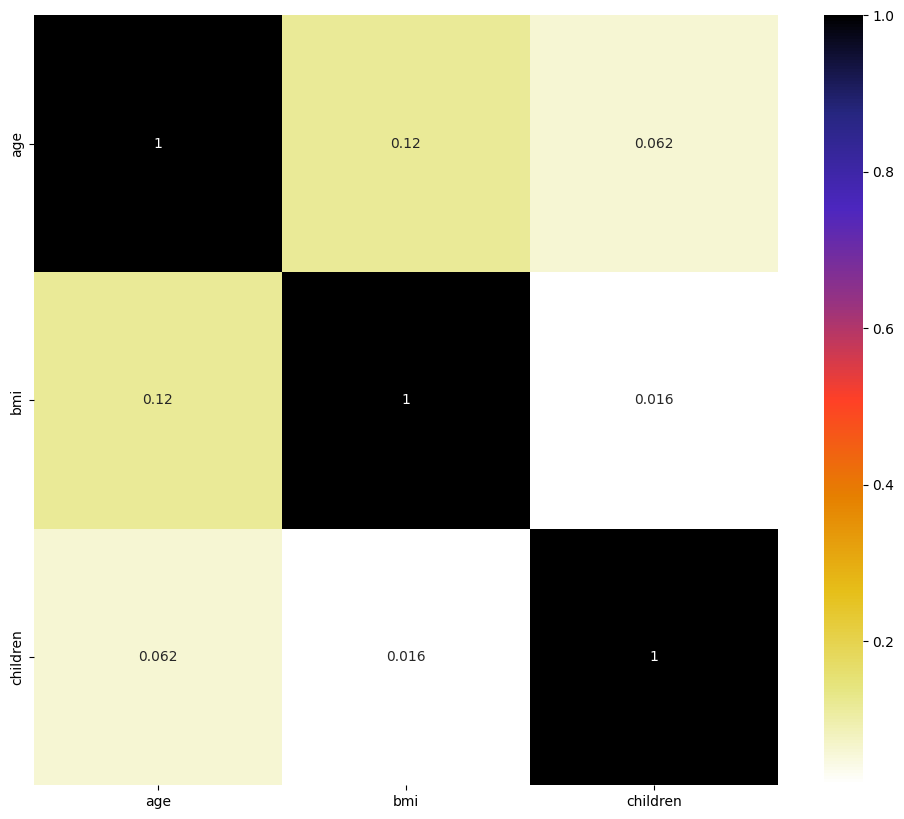

In [ ]:
import seaborn as sns
#Using Pearson Correlation -1 to +1
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.7) # to avoid overfitting only of X_train
len(set(corr_features))

0

In [ ]:
corr_features

set()

In [ ]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

age     sex     bmi  children smoker     region
578    52    male  30.200         1     no  southwest
610    47  female  29.370         1     no  southeast
569    48    male  40.565         2    yes  northwest
1034   61    male  38.380         0     no  northwest
198    51  female  18.050         0     no  northwest
...   ...     ...     ...       ...    ...        ...
1261   28    male  37.100         1     no  southwest
494    21    male  25.700         4    yes  southwest
97     55    male  38.280         0     no  southeast
418    64    male  39.160         1     no  southeast
920    62  female  25.000         0     no  southwest

[402 rows x 6 columns]

In [ ]:
#Let try with Big Dataset

df=pd.read_csv('santander.csv',nrows=10000)
X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3,
    random_state=0)

<Axes: >

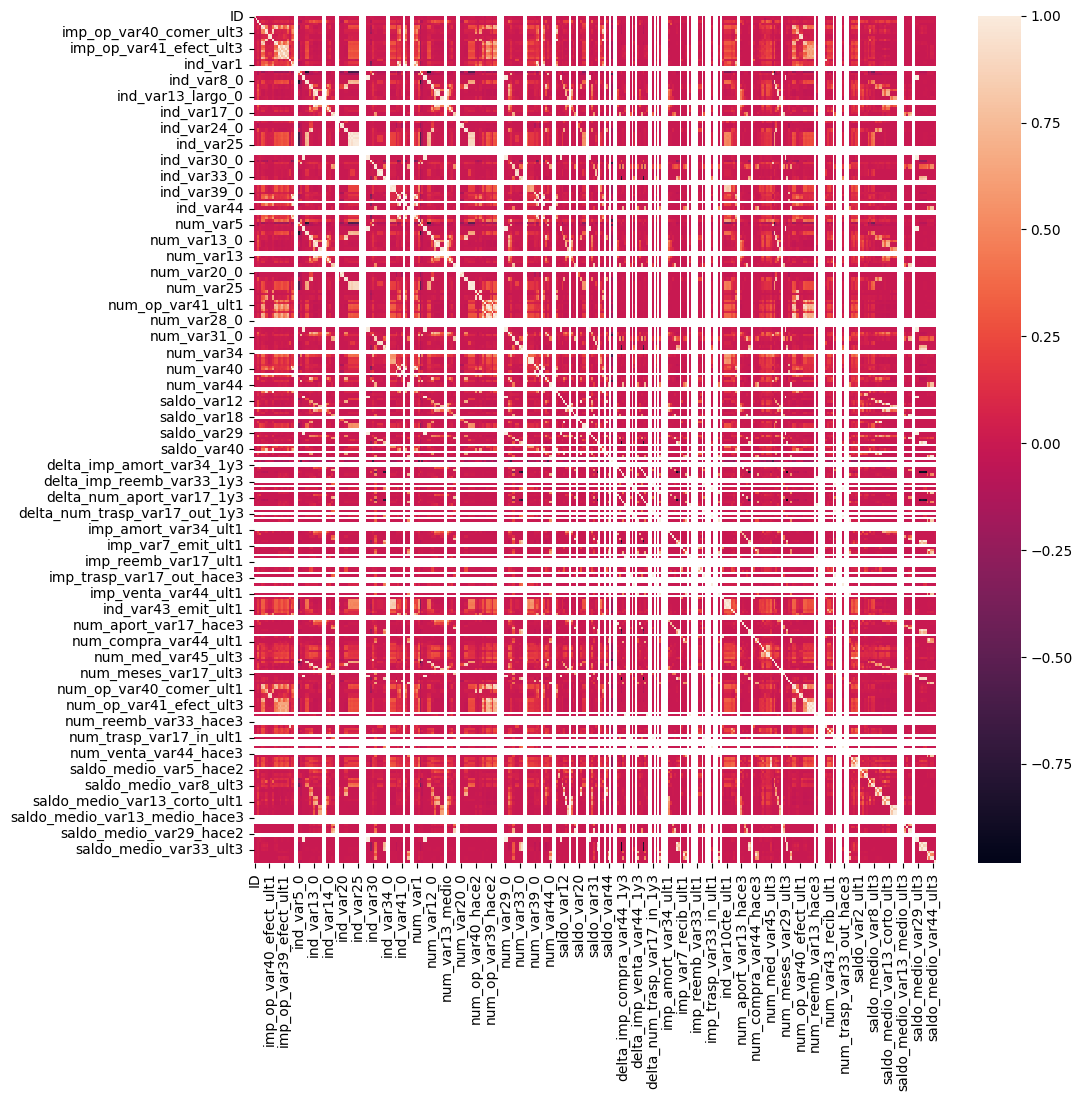

In [ ]:
import seaborn as sns
#Using Pearson Correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [ ]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

156

In [ ]:
corr_features

{'delta_imp_aport_var33_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var20',
 'ind_var24',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var31',
 'ind_var32',
 'ind_var32_0',
 'ind_var37',
 'ind_var37_0',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var44',
 'ind_var6',
 'ind_var8',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_aport_

In [ ]:
X_train.drop(corr_features,axis=1)

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
7681  15431     2     42               840.0                  4477.02   
9031  18181     2     31                 0.0                    52.32   
3691   7411     2     51                 0.0                     0.00   
202     407     2     36                 0.0                     0.00   
5625  11280     2     23                 0.0                     0.00   
...     ...   ...    ...                 ...                      ...   
9225  18564     2     33                 0.0                     0.00   
4859   9723     2     24                 0.0                     0.00   
3264   6557     2     24                 0.0                     0.00   
9845  19796     2     38                 0.0                     0.00   
2732   5441     2     23                 0.0                     0.00   

      imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
7681                  4989.54                      0.0   
9031                    52.32                      0.0   
3691                     0.00                      0.0   
202                      0.00                      0.0   
5625                     0.00                      0.0   
...                       ...                      ...   
9225                     0.00                      0.0   
4859                     0.00                      0.0   
3264                     0.00                      0.0   
9845                     0.00                      0.0   
2732                     0.00                      0.0   

      imp_op_var40_comer_ult3  imp_op_var40_efect_ult1  \
7681                      0.0                        0   
9031                      0.0                        0   
3691                      0.0                        0   
202                       0.0                        0   
5625                      0.0                        0   
...                       ...                      ...   
9225                      0.0                        0   
4859                      0.0                        0   
3264                      0.0                        0   
9845                      0.0                        0   
2732                      0.0                        0   

      imp_op_var41_comer_ult1  ...  saldo_medio_var13_medio_hace2  \
7681                  4477.02  ...                              0   
9031                    52.32  ...                              0   
3691                     0.00  ...                              0   
202                      0.00  ...                              0   
5625                     0.00  ...                              0   
...                       ...  ...                            ...   
9225                     0.00  ...                              0   
4859                     0.00  ...                              0   
3264                     0.00  ...                              0   
9845                     0.00  ...                              0   
2732                     0.00  ...                              0   

      saldo_medio_var13_medio_hace3  saldo_medio_var13_medio_ult1  \
7681                              0                             0   
9031                              0                             0   
3691                              0                             0   
202                               0                             0   
5625                              0                             0   
...                             ...                           ...   
9225                              0                             0   
4859                              0                             0   
3264                              0                             0   
9845                              0                             0   
2732                              0                             0   

      saldo_medio_var13_medio_ult3  saldo_medio_var17_hace2  \
7681             

#3.Feature Selection-Information gain - mutual information In Classification Problem Statements
Mutual Information
MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

How Mutual Information is calculated for independent feature(s) wrt dependent feature, above formula is used

In [ ]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735

In [ ]:
df['Wine'].unique()

array([1, 2, 3])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Wine'], axis=1),
    df['Wine'],
    test_size=0.3,
    random_state=0)

In [ ]:
X_train.head()

Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
22     13.71        1.86  2.36  16.6  101     2.61        2.88   
108    12.22        1.29  1.94  19.0   92     2.36        2.04   
175    13.27        4.28  2.26  20.0  120     1.59        0.69   
145    13.16        3.57  2.15  21.0  102     1.50        0.55   
71     13.86        1.51  2.67  25.0   86     2.95        2.86   

     Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
22                   0.27     1.69       3.80  1.11  4.00     1035  
108                  0.39     2.08       2.70  0.86  3.02      312  
175                  0.43     1.35      10.20  0.59  1.56      835  
145                  0.43     1.30       4.00  0.60  1.68      830  
71                   0.21     1.87       3.38  1.36  3.16      410

In [ ]:
#Feature selection using mutual_info_classif
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info #0-1, close to 1 higher dependencies on target variable

array([0.41356273, 0.29132508, 0.16382233, 0.29369255, 0.1568118 ,
       0.47041048, 0.71382672, 0.12447033, 0.25527508, 0.622567  ,
       0.54014328, 0.55195103, 0.53922222])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.713827
Color.int               0.622567
OD                      0.551951
Hue                     0.540143
Proline                 0.539222
Phenols                 0.470410
Alcohol                 0.413563
Acl                     0.293693
Malic.acid              0.291325
Proanth                 0.255275
Ash                     0.163822
Mg                      0.156812
Nonflavanoid.phenols    0.124470
dtype: float64

<Axes: >

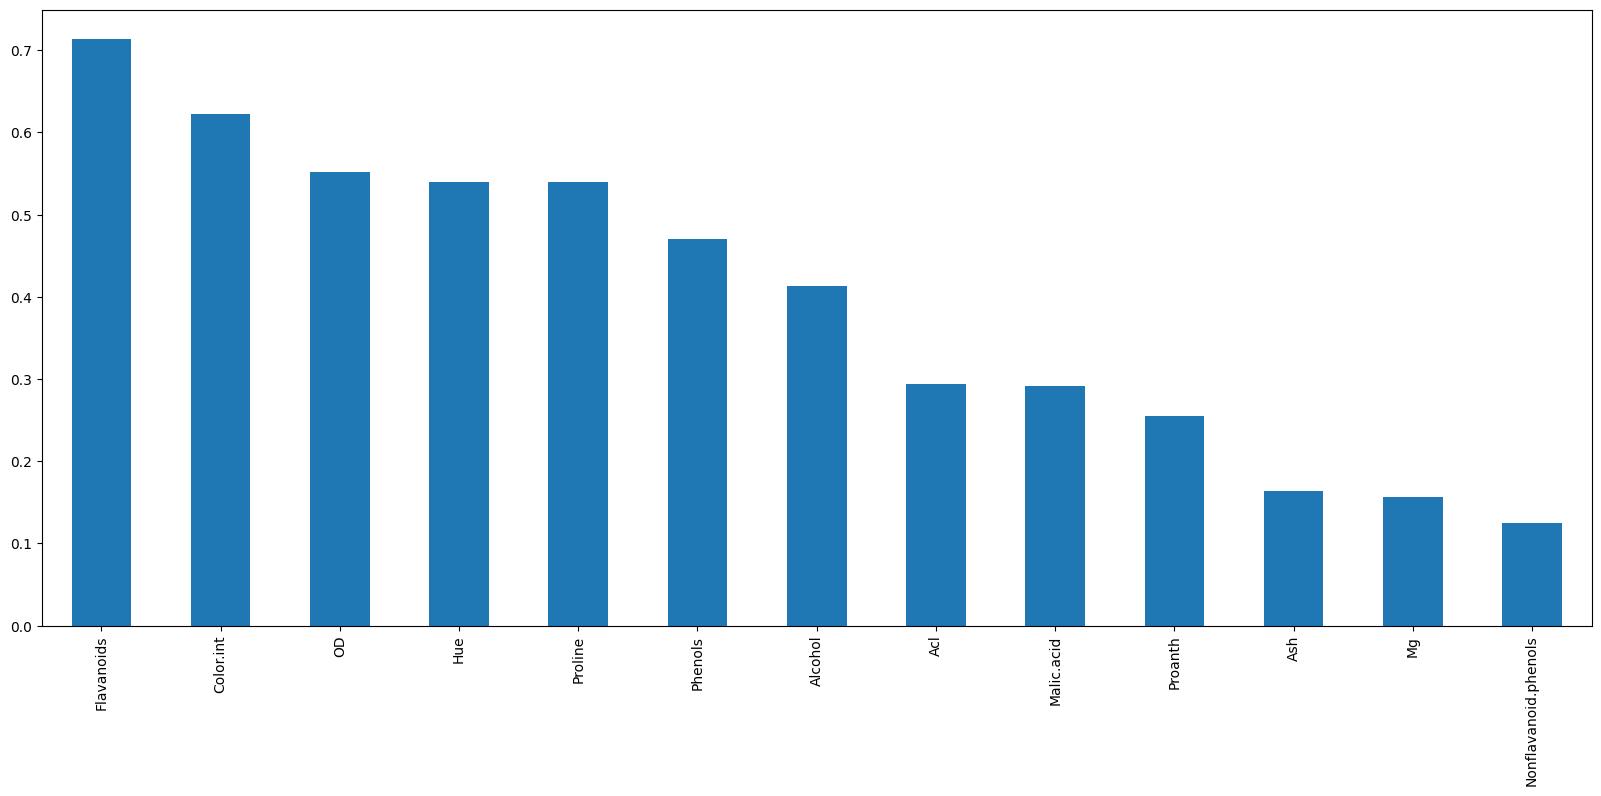

In [ ]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

#Flavanoids have highest dependencies on target variable

In [ ]:
#when too many features, we don't need all the features, so we can choose top 10/20 feautures using SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=6) #top 6 features
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()] #get_support gives indexes

Index(['Phenols', 'Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

Comparion of Univariate And Mutual Information

Comparison of F-test and mutual information https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py

# Feature Selection-Information gain - mutual information In Regression Problem Statements

In [ ]:
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
import pandas as pd
housing_df=pd.read_csv('housing.csv')

housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
housing_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
#We are considering obeject or categorical values for now

In [ ]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(housing_df.select_dtypes(include=numeric_lst).columns)

In [ ]:
numerical_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [ ]:
housing_df=housing_df[numerical_cols]

In [ ]:
housing_df.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [ ]:
housing_df=housing_df.drop("Id",axis=1)

In [ ]:
### It is always a good practice to split train and test data to avoid
#overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(housing_df.drop(labels=['SalePrice'], axis=1),
    housing_df['SalePrice'],
    test_size=0.3,
    random_state=0)

In [ ]:
X_train.isnull().sum()

MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [ ]:
from sklearn.feature_selection import mutual_info_regression # for classifiation mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train) # mutual info between dependent and independent features
mutual_info

array([0.24997016, 0.2164809 , 0.16452715, 0.53027229, 0.10783493,
       0.3560376 , 0.24391477, 0.10939288, 0.16164218, 0.        ,
       0.11200637, 0.38728741, 0.31262658, 0.22814863, 0.        ,
       0.47992471, 0.03115943, 0.00453405, 0.26077869, 0.07849635,
       0.03815576, 0.01750795, 0.18283452, 0.18543203, 0.27039608,
       0.37615492, 0.36916766, 0.07209931, 0.17093365, 0.00983215,
       0.        , 0.011355  , 0.01353856, 0.        , 0.        ,
       0.00178819])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.530272
GrLivArea        0.479925
TotalBsmtSF      0.387287
GarageCars       0.376155
GarageArea       0.369168
YearBuilt        0.356038
1stFlrSF         0.312627
GarageYrBlt      0.270396
FullBath         0.260779
MSSubClass       0.249970
YearRemodAdd     0.243915
2ndFlrSF         0.228149
LotFrontage      0.216481
Fireplaces       0.185432
TotRmsAbvGrd     0.182835
OpenPorchSF      0.170934
LotArea          0.164527
BsmtFinSF1       0.161642
BsmtUnfSF        0.112006
MasVnrArea       0.109393
OverallCond      0.107835
HalfBath         0.078496
WoodDeckSF       0.072099
BedroomAbvGr     0.038156
BsmtFullBath     0.031159
KitchenAbvGr     0.017508
PoolArea         0.013539
ScreenPorch      0.011355
EnclosedPorch    0.009832
BsmtHalfBath     0.004534
YrSold           0.001788
BsmtFinSF2       0.000000
LowQualFinSF     0.000000
3SsnPorch        0.000000
MiscVal          0.000000
MoSold           0.000000
dtype: float64

<Axes: >

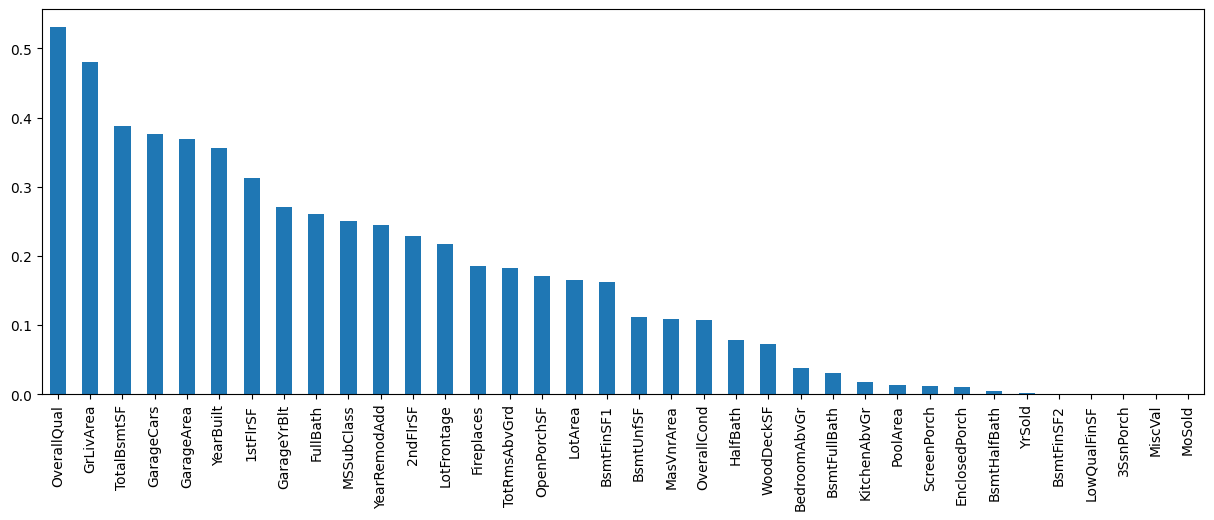

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [ ]:
from sklearn.feature_selection import SelectPercentile #in classification - selectKBest

In [ ]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x7f4009fdf4c0>)

In [ ]:

selected_top_columns.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [ ]:
X_train.columns[selected_top_columns.get_support()] # Most imp Features ie below 7 features hold 80% of entire weightage

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [ ]:
#Mutual Information captures alot of info based on Entropy and Info gain

#Fisher Score- Chisquare Test For Feature Selection
Compute chi-squared stats between each non-negative feature and class.

This score should be used to evaluate categorical variables in a classification task.
This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification. The Chi Square statistic is commonly used for testing relationships between categorical variables.

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

In [ ]:
import seaborn as sns
df=sns.load_dataset('titanic')

In [ ]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
##['sex','embarked','alone','pclass','Survived']
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

sex embarked  alone  pclass  survived
0    male        S  False       3         0
1  female        C  False       1         1
2  female        S   True       3         1
3  female        S  False       1         1
4    male        S   True       3         0

In [ ]:
df['sex']=np.where(df['sex']=="male",1,0)
df.head()

sex embarked  alone  pclass  survived
0    1        S  False       3         0
1    0        C  False       1         1
2    0        S   True       3         1
3    0        S  False       1         1
4    1        S   True       3         0

In [ ]:
### Let's perform label encoding on sex column
import numpy as np
### let's perform label encoding on embarked
ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(), 0)}
df['embarked'] = df['embarked'].map(ordinal_label)

In [ ]:
df.head()

sex  embarked  alone  pclass  survived
0    1         0  False       3         0
1    0         1  False       1         1
2    0         0   True       3         1
3    0         0  False       1         1
4    1         0   True       3         0

In [ ]:
### let's perform label encoding on alone
df['alone']=np.where(df['alone']==True,1,0)

In [ ]:
df.head()

sex  embarked  alone  pclass  survived
0    1         0      0       3         0
1    0         1      0       1         1
2    0         0      1       3         1
3    0         0      0       1         1
4    1         0      1       3         0

In [ ]:
### train Test split is usually done to avaoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']],
                                              df['survived'],test_size=0.3,random_state=100)

In [ ]:
X_train.head()

sex  embarked  alone  pclass
69     1         0      0       3
85     0         0      0       3
794    1         0      1       3
161    0         0      1       2
815    1         0      1       1

In [ ]:
X_train['sex'].unique()

array([1, 0])

In [ ]:
X_train.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

In [ ]:
## Perform chi2 test
### chi2 returns 2 values -> Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [ ]:
f_p_values # 1st array is fscore -> higher the better , 2nd array is p_value -> less the better

(array([65.67929505,  7.55053653, 10.88471585, 21.97994154]),
 array([5.30603805e-16, 5.99922095e-03, 9.69610546e-04, 2.75514881e-06]))

In [ ]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

sex         5.306038e-16
embarked    5.999221e-03
alone       9.696105e-04
pclass      2.755149e-06
dtype: float64

In [ ]:
p_values.sort_index(ascending=False)

sex         5.306038e-16
pclass      2.755149e-06
embarked    5.999221e-03
alone       9.696105e-04
dtype: float64

Observation
Sex Column is the most important column when compared to the output feature Survived

https://scikit-learn.org/stable/modules/model_evaluation.html